# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import re

# Constants
all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']


finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]

tnr = {'fontname': 'Times New Roman'}


In [23]:
# Read all files in directory, returns list of filenames
def get_files(dir='sessionData'):
    files = [(f) for f in os.listdir(dir) if os.path.isfile(f'{dir}/{f}')]
    return files
    
# Reads individual file, returns datafram and column headers
def read_file(filename: str, dir='sessionData'):
    try:
        data = pd.read_csv(f'{dir}/{filename}')
        # stripping spaces from columns an data...
        data.columns = data.columns.str.strip()
        data:pd.DataFrame = data.map(lambda x: x.strip() if isinstance(x, str) else x)
        return data #, data.columns    
    except:
        print("Error reading file")
        return None

In [24]:
def get_timestamp(frame):
    date = frame['date'].iloc[0]
    time = frame['time'].iloc[0]
    timestamp = f'{date} {time}'
    timestamp_datetime = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
    
    return timestamp_datetime

def get_frameMean(frame):
    # Euclidean distances of all points
    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    frame_mean = np.mean(distances)
    return frame_mean

def get_tipMean(frame):
    # Euclidean distances of fingertips
    tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    tip_mean = np.mean(tipDistances)
    return tip_mean

In [25]:
# Returns auxiliary frametime data for a list of frametimes from a single dataset
def get_statistics(data_list, printData=True):
    mean = np.mean(data_list)
    minimum = np.min(data_list)
    maximum = np.max(data_list)
    median = np.median(data_list)
    first_quartile = np.quantile(data_list, 0.25)
    thrid_quartile = np.quantile(data_list, 0.75)
    iqr = thrid_quartile - first_quartile
    std = np.std(data_list)
    
    data = {'mean': mean, 'minimum': minimum, 'maximum': maximum, 'median': median, 'Q1': first_quartile, 'Q3': thrid_quartile, 'IQR': iqr, 'STD': std}
    if printData:
        for k,v in data.items():
            print(f'{k}: {v}')
    
    return data

In [26]:
def get_session_time(data:pd.DataFrame):
    start = data['date'].iloc[0] + " " + data['time'].iloc[0]
    end = data['date'].iloc[-1] + " " + data['time'].iloc[-1]
            
    start_time = datetime.strptime(start, '%Y-%m-%d %H:%M:%S.%f')
    end_time = datetime.strptime(end, '%Y-%m-%d %H:%M:%S.%f')
    
    duration = end_time - start_time
    
    return duration

In [27]:
# Processes a single dataset file, returns frame means, tip means, and frametimes
def process_frames(data, print:bool = True):
    frame_means  = []
    tip_means    = []
    finger_means = []
    frametimes   = []

    t0:datetime = None
    # for each frame in dataframe
    for i, frame in data.groupby('frame'):
        timestamp = get_timestamp(frame)
        frame_mean = get_frameMean(frame)
        tip_mean = get_tipMean(frame)
        frame_means.append(frame_mean)
        tip_means.append(tip_mean)
        
        if i != 0:
            frametime:datetime = (timestamp - t0).microseconds/1000
            frametimes.append(frametime)
            
        t0 = timestamp


        if print:
            print(f'Frame {i}:')
            print(f'Timestamp: {timestamp}')
            print(f'Mean Distance: {frame_mean:.2f}')
            print(f'Frametime: {frametime} ms')
        # print(f'Minimum Distance: {frame_min:.2f}')
        # print(f'Maximum Distance: {frame_max:.2f}')
        # print(f'Standard Deviation: {frame_std:.2f}')
            print()
        
    return frame_means, tip_means, frametimes


In [66]:
# Plot all frames
def plot_frames(frame_means, tip_means, filename="", plot=(True,True,True,True,True)):
    window_size = 5
    all_moving_average = np.convolve(frame_means, np.ones(window_size)/window_size, mode='valid')
    tips_moving_average = np.convolve(tip_means, np.ones(window_size)/window_size, mode='valid')
    
    if len(filename) > 0:
        pid = filename[12:17]
        print(pid)
    else:
        pid=filename

    if plot[0]:
        title = 'Mean Fingertip Distances Across Frames'
        newfile = title.replace(' ', '')
        newfile = f'../Images/meanDistances/{pid}_{newfile}.png'
        fig = plt.figure(figsize=(8,6))
        plt.plot(range(1, len(tip_means) + 1), frame_means, marker='o', linestyle='-', color='b')
        plt.xlabel('Frame #', **tnr)
        plt.ylabel('Mean Distance (px)', **tnr)
        plt.title(f'{pid} - {title}', **tnr)
        plt.show()
        fig.savefig(newfile)

    if plot[1]:
        title = 'Smoothed Mean Fingertip Distances Across Frames'
        newfile = title.replace(' ', '')
        newfile = f'../Images/meanDistances/{pid}_{newfile}.png'
        fig = plt.figure(figsize=(8,6))
        plt.plot(range(1, len(tip_means) + 1)[:len(tips_moving_average)], tips_moving_average, marker='o', linestyle='-', color='b')
        plt.xlabel('Frame #', **tnr)
        plt.ylabel('Mean Distance (px)', **tnr)
        plt.title(f'{pid} - {title}', **tnr)
        plt.show()
        fig.savefig(newfile)

    if plot[2]:
        title = 'Mean Point Distances Across Frames'
        newfile = title.replace(' ', '')
        newfile = f'../Images/meanDistances/{pid}_{newfile}.png'
        fig = plt.figure(figsize=(8,6))
        plt.plot(range(1, len(frame_means) + 1), frame_means, marker='o', linestyle='-', color='g')
        plt.xlabel('Frame #', **tnr)
        plt.ylabel('Mean Distance (px)', **tnr)
        plt.title(f'{pid} - {title}', **tnr)
        plt.show()
        fig.savefig(newfile)
        
    if plot[3]:
        title = 'Smoothed Point Frame Distances Across Frames'
        newfile = title.replace(' ', '')
        newfile = f'../Images/meanDistances/{pid}_{newfile}.png'
        fig = plt.figure(figsize=(8,6))
        plt.plot(range(1, len(frame_means) + 1)[:len(all_moving_average)], all_moving_average, marker='o', linestyle='-', color='g')
        plt.xlabel('Frame #', **tnr)
        plt.ylabel('Mean Distance (px)', **tnr)
        plt.title(f'{pid} - {title}', **tnr)
        plt.show()
        fig.savefig(newfile)

    start_frame, end_frame = 50, 50
    trimmed_tip_means = tip_means[start_frame:-end_frame]
    trimmed_tips_moving_average = tips_moving_average[start_frame:end_frame + len(trimmed_tip_means)]
    
    if plot[4]:
        title = 'Tips Only Smoothed Mean Distances Across Frames'
        newfile = title.replace(' ', '')
        newfile = f'../Images/meanDistances/{pid}_{newfile}.png'
        fig = plt.figure(figsize=(8,6))
        plt.plot(range(start_frame + 1, start_frame + 1 + len(trimmed_tip_means)), trimmed_tips_moving_average, marker='o', linestyle='-', color='b')
        plt.xlabel('Frame #', **tnr)
        plt.ylabel('Mean Distance (px)', **tnr)
        plt.title(f'{pid} - {title}', **tnr)
        plt.show()
        fig.savefig(newfile)

In [29]:
# Plots path of given point
def plot_path(data, point_to_plot = 'thumbTip'):
    x_coords = data[f'{point_to_plot}.x']
    y_coords = data[f'{point_to_plot}.y']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

    plt.title(f'Path of {point_to_plot}', **tnr)
    plt.colorbar(label='Frame Number')
    # plt.grid(True)
    plt.show()


    point_to_plot = 'littleTip'
    x_coords = data[f'{point_to_plot}.x']
    y_coords = data[f'{point_to_plot}.y']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

    plt.title(f'Path of {point_to_plot}', **tnr)
    plt.colorbar(label='Frame Number')
    # plt.grid(True)
    plt.show()

In [30]:
# Plots path of finger pair
def plot_pairwise(data:pd.DataFrame, finger_name:str='little'):
    ftc = [f'{finger_name}Tip', f'{finger_name}Tip2']

    # pairwise euclidean distances (using fingertips)
    for fingertip1 in ftc:
        for fingertip2 in ftc:
            if fingertip1 != fingertip2:
                data[f'{fingertip1}_{fingertip2}_distance'] = np.sqrt((data[f'{fingertip1}.x'] - data[f'{fingertip2}.x'])**2 +
                                                                    (data[f'{fingertip1}.y'] - data[f'{fingertip2}.y'])**2)
    #plots
    for fingertip1 in ftc:
        for fingertip2 in ftc:
            if fingertip1 != fingertip2:
                distance_column = f'{fingertip1}_{fingertip2}_distance'
                plt.plot(data['frame'], data[distance_column], label=f'{fingertip1} to {fingertip2}')

    plt.xlabel('Frame #', **tnr)
    plt.ylabel('pairwise distance', **tnr)
    plt.title('pairwise distances of fingertips', **tnr)
    plt.show()

In [31]:
# EXECUTE CODE FROM HERE DOWNWARDS

files = ['sessionData-102-0.csv', 'sessionData-205-0.csv', 'sessionData-301-0.csv']
# files = get_files()

for f in files:
    print(f'-----\'{f}\' frametime data-----')
    dataframe = read_file(f)
    fm, tm, ft = process_frames(dataframe, print=False)
    ft_data = get_statistics(ft)
    print('Mean FPS:', 1000/ft_data['mean'])

    

-----'sessionData-102-0.csv' frametime data-----
mean: 35.324786324786324
minimum: 25.0
maximum: 267.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 13.877770697818779
Mean FPS: 28.308734575368984
-----'sessionData-205-0.csv' frametime data-----
mean: 33.817843866171
minimum: 27.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.700739111826935
Mean FPS: 29.570187974057383
-----'sessionData-301-0.csv' frametime data-----
mean: 255.9
minimum: 215.0
maximum: 477.0
median: 237.0
Q1: 234.75
Q3: 243.25
IQR: 8.5
STD: 50.373008645503795
Mean FPS: 3.9077764751856194


mean: 33.35446685878963
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.487121057119097
Mean FPS: 29.980991878348018
104-0


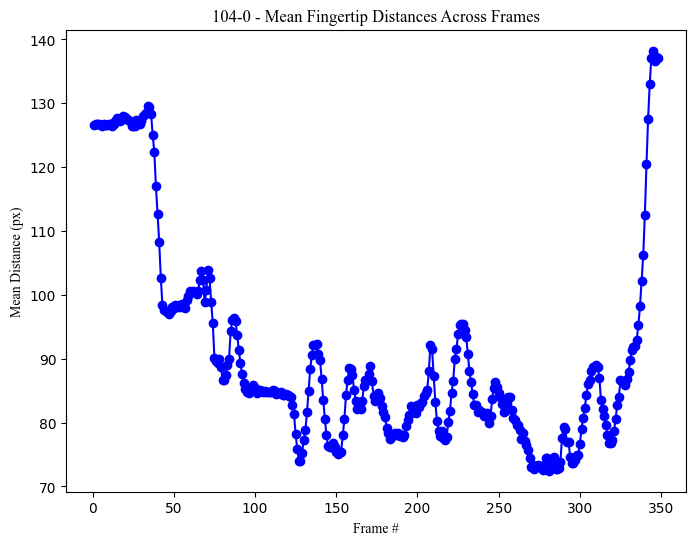

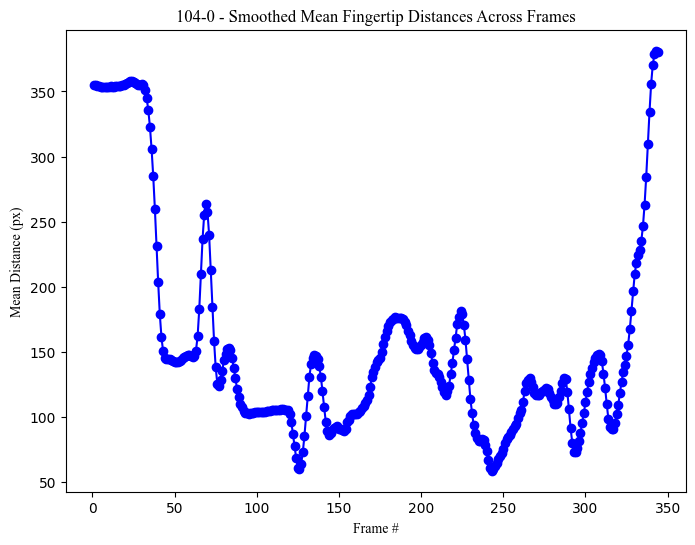

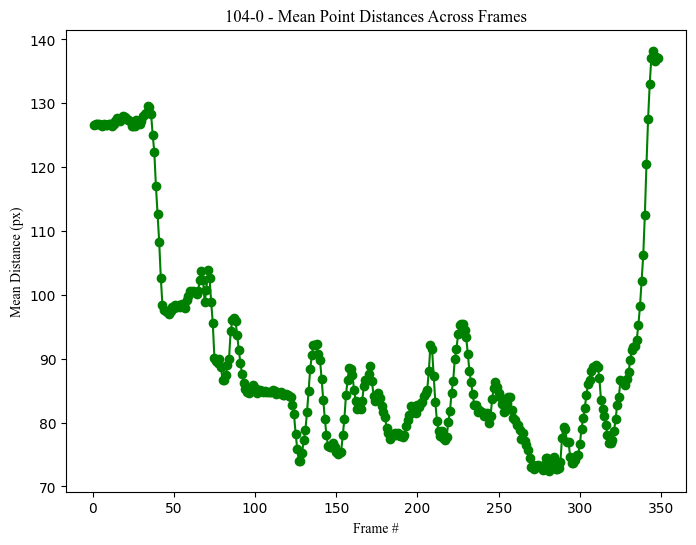

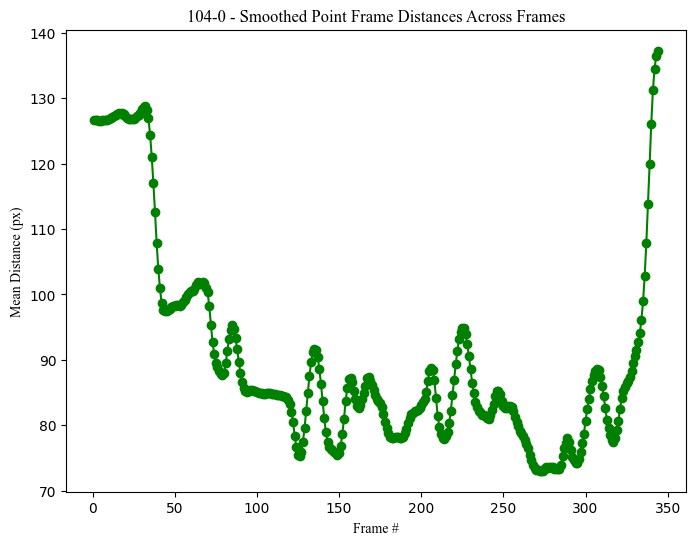

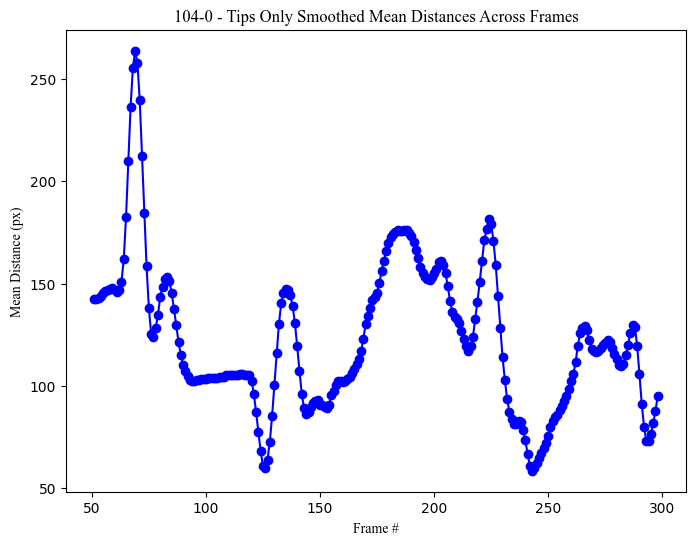

In [67]:
dataframe = read_file('sessionData-104-0.csv')
fm, tm, ft = process_frames(dataframe, print=False)
ft_data = get_statistics(ft)
print('Mean FPS:', 1000/ft_data['mean'])

plot_frames(fm,tm,filename="sessionData-104-0.csv", plot=(False,False,False,False,True))

mean: 35.324786324786324
minimum: 25.0
maximum: 267.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 13.877770697818779
Mean FPS: 28.308734575368984
102-0


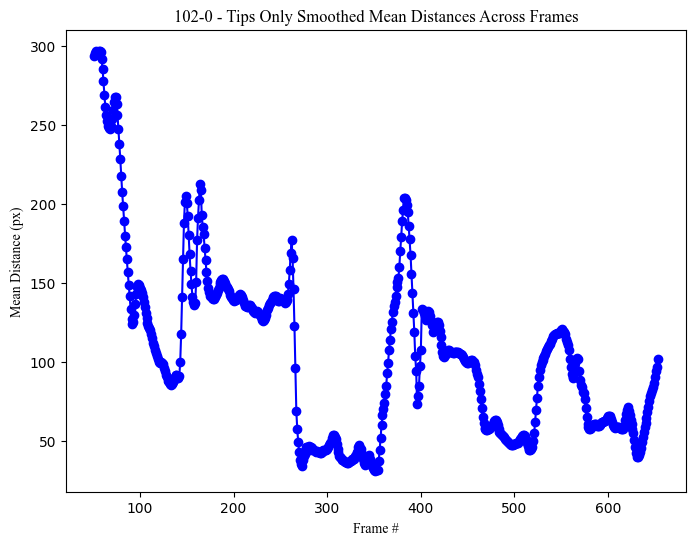

mean: 33.87158469945355
minimum: 26.0
maximum: 100.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 5.635311309439916
Mean FPS: 29.523271759296605
102-1


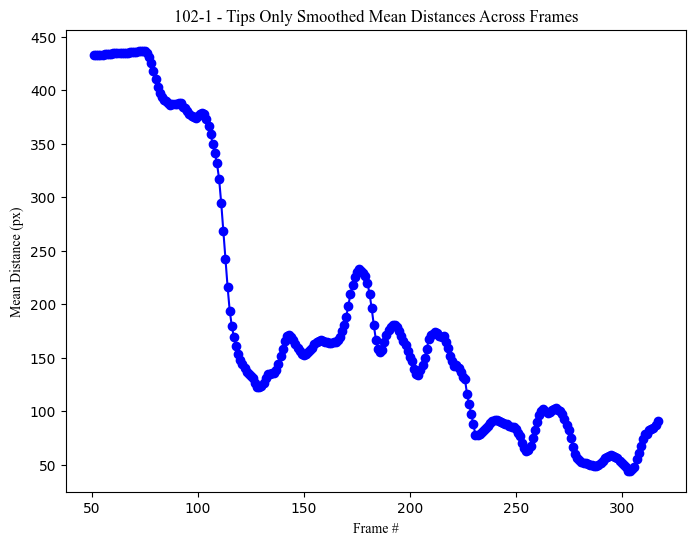

mean: 33.959526159921026
minimum: 26.0
maximum: 133.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.123227875681982
Mean FPS: 29.446818406441675
102-2


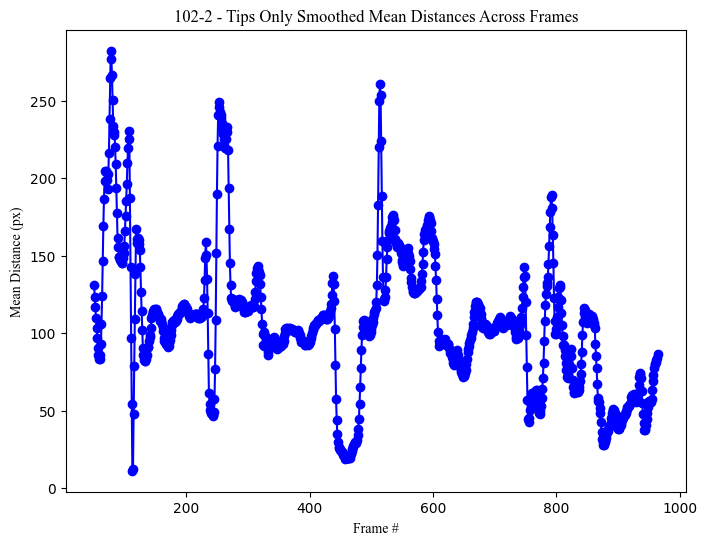

mean: 33.28542914171657
minimum: 26.0
maximum: 40.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.838913825429118
Mean FPS: 30.043175821539936
103-0


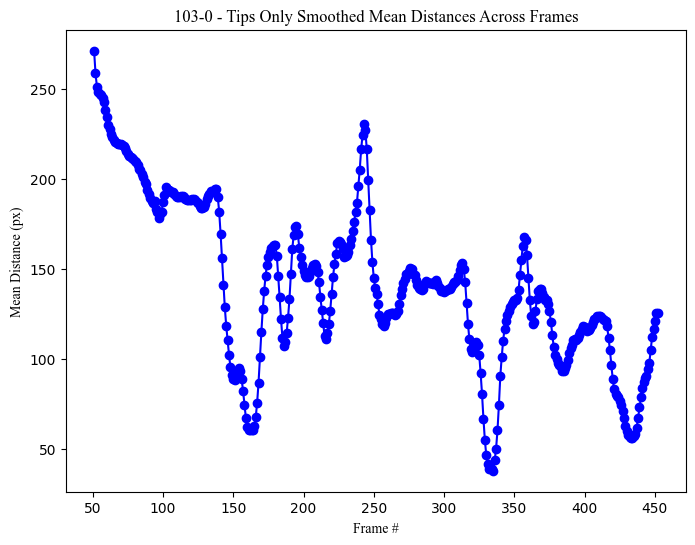

mean: 33.42587601078167
minimum: 23.0
maximum: 71.0
median: 33.0
Q1: 32.5
Q3: 34.0
IQR: 1.5
STD: 2.6045324325440538
Mean FPS: 29.91694218208209
103-1


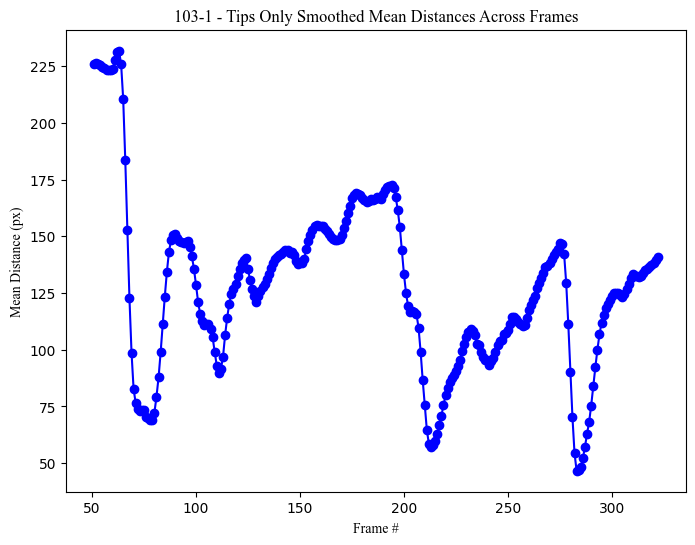

mean: 33.38628762541806
minimum: 26.0
maximum: 67.0
median: 33.0
Q1: 32.25
Q3: 34.0
IQR: 1.75
STD: 2.187593307528739
Mean FPS: 29.95241672927623
103-2


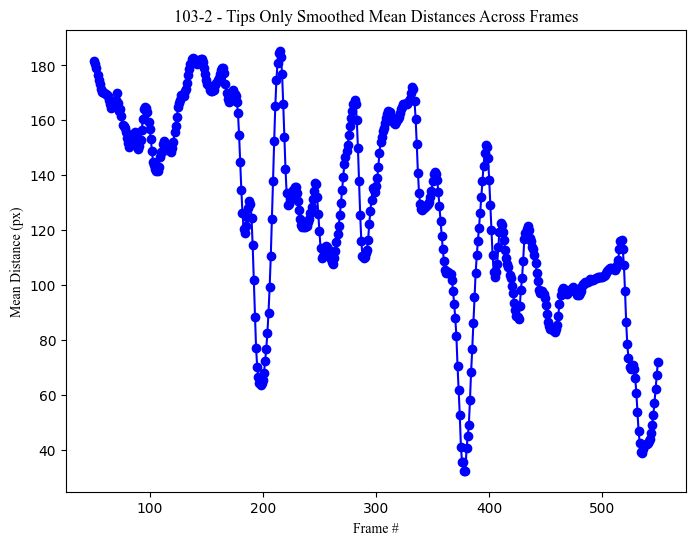

mean: 33.35446685878963
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.487121057119097
Mean FPS: 29.980991878348018
104-0


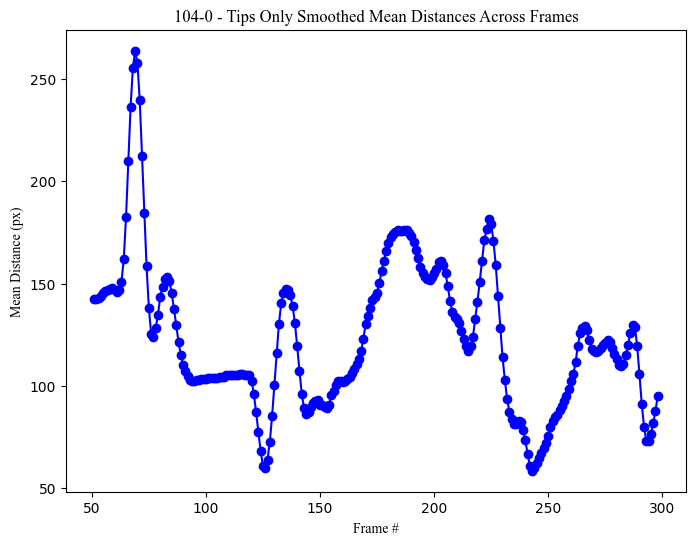

mean: 33.338297872340426
minimum: 25.0
maximum: 42.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.8549592174778697
Mean FPS: 29.995532580254004
104-1


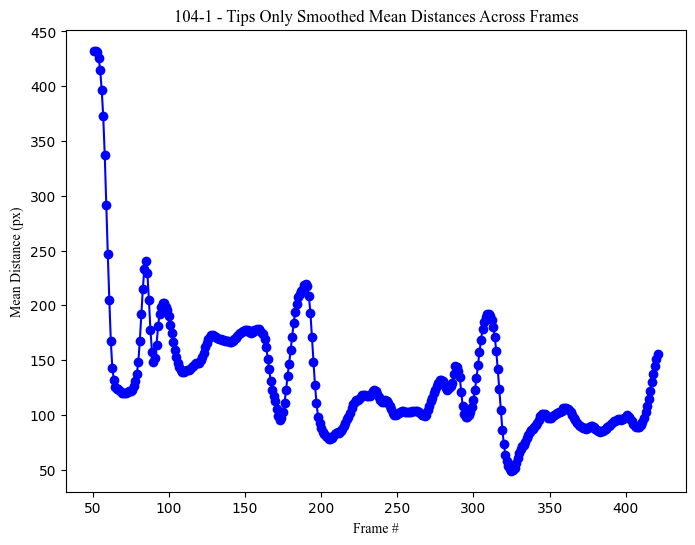

mean: 33.341509433962266
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.4282769619718998
Mean FPS: 29.992643313904136
104-2


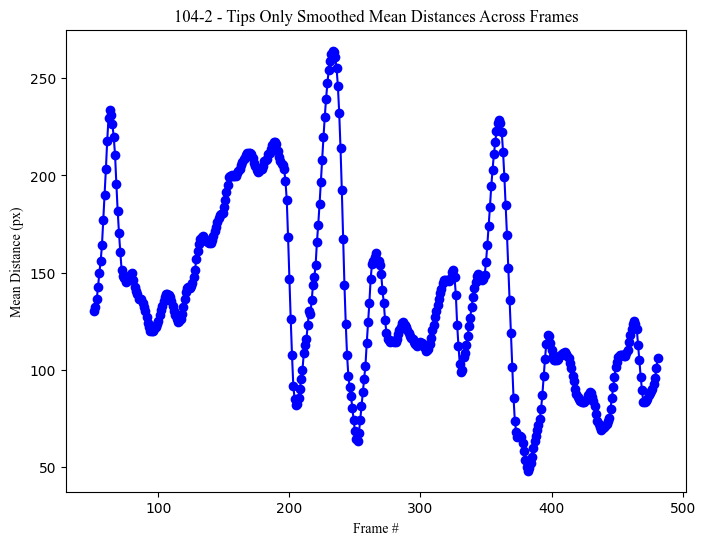

mean: 33.341948310139166
minimum: 25.0
maximum: 41.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.5440419000073338
Mean FPS: 29.992248524238267
105-0


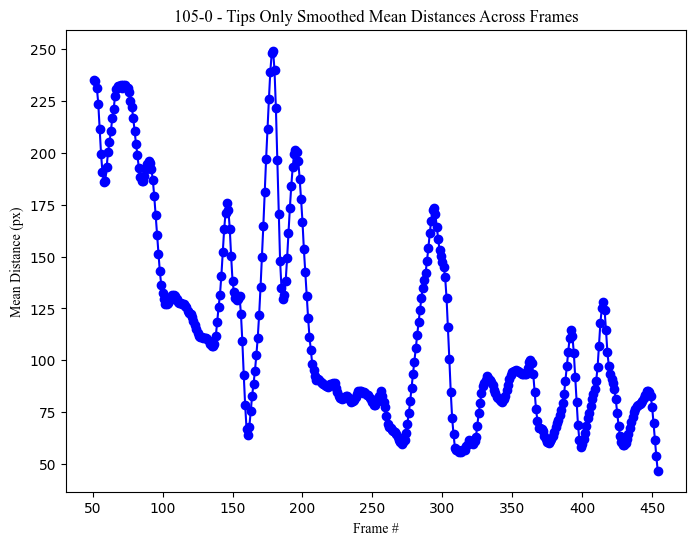

mean: 33.523676880222844
minimum: 26.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 3.9239102585712424
Mean FPS: 29.829663481512252
105-1


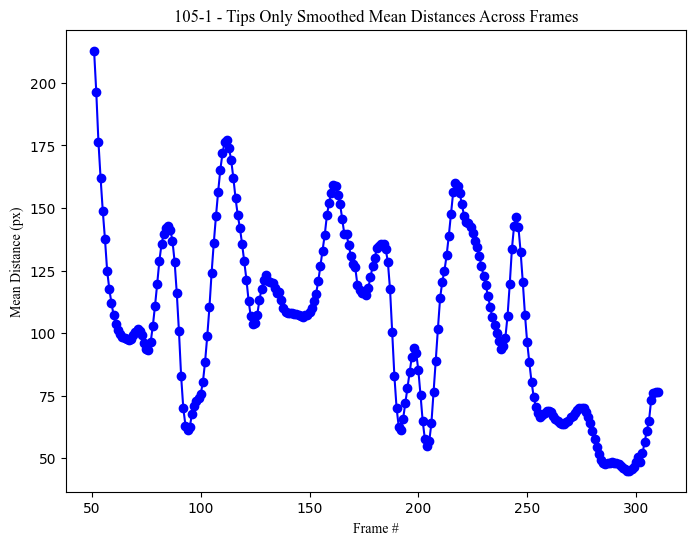

mean: 33.329621380846326
minimum: 25.0
maximum: 42.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.7218729350714947
Mean FPS: 30.003341129301702
105-2


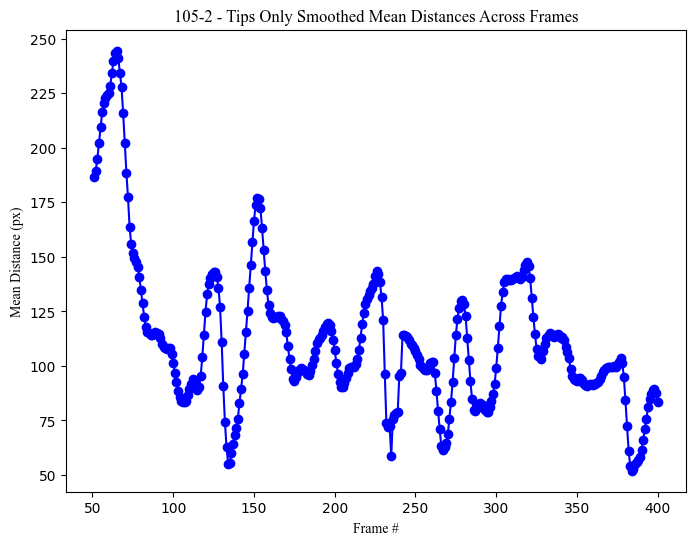

mean: 33.46964285714286
minimum: 26.0
maximum: 68.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 2.6963877716875446
Mean FPS: 29.87782105319319
106-0


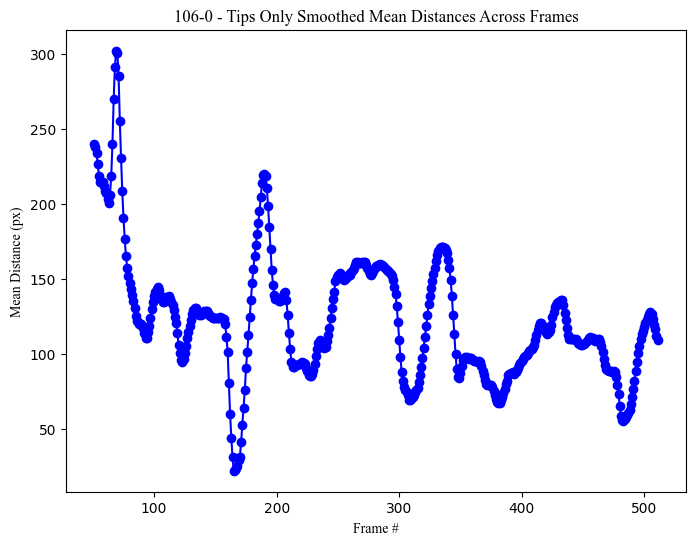

mean: 33.433497536945815
minimum: 23.0
maximum: 68.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 2.513528796711646
Mean FPS: 29.91012229261824
106-1


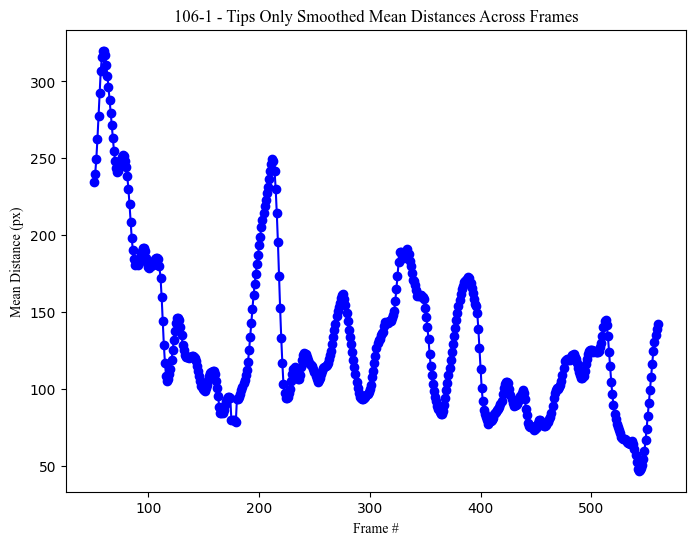

mean: 33.642987249544625
minimum: 27.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 4.19124456063477
Mean FPS: 29.723876556578237
106-2


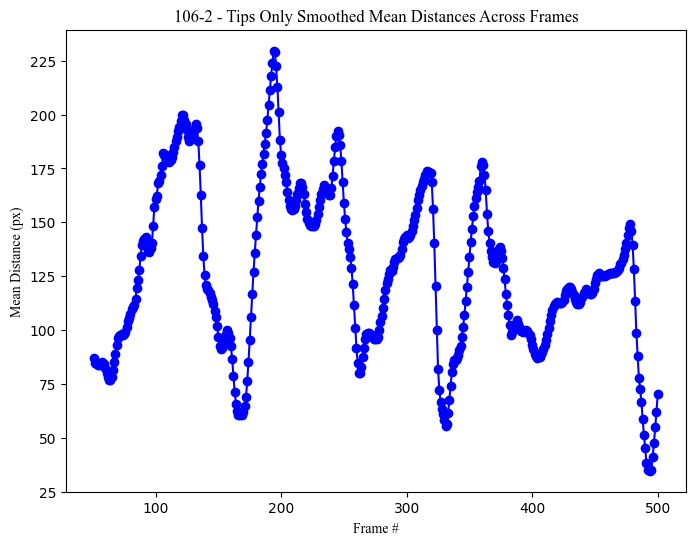

mean: 34.23831775700935
minimum: 24.0
maximum: 233.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 10.272194069517681
Mean FPS: 29.2070424457486
107-0


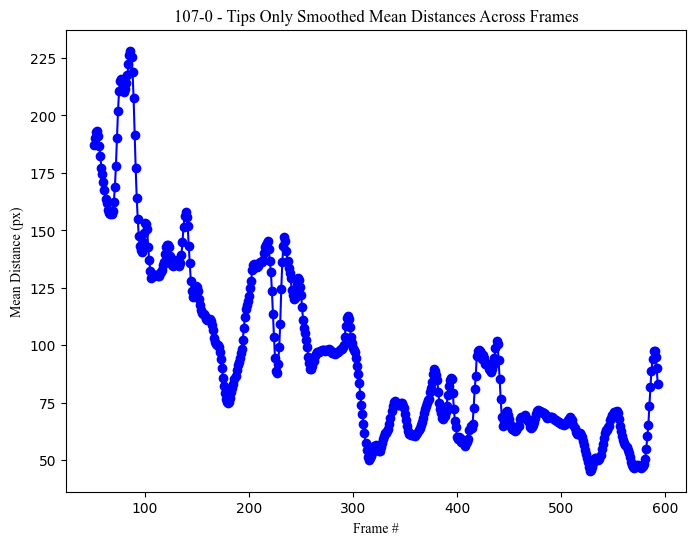

mean: 34.06284153005465
minimum: 26.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.198350442646814
Mean FPS: 29.357503810058553
107-1


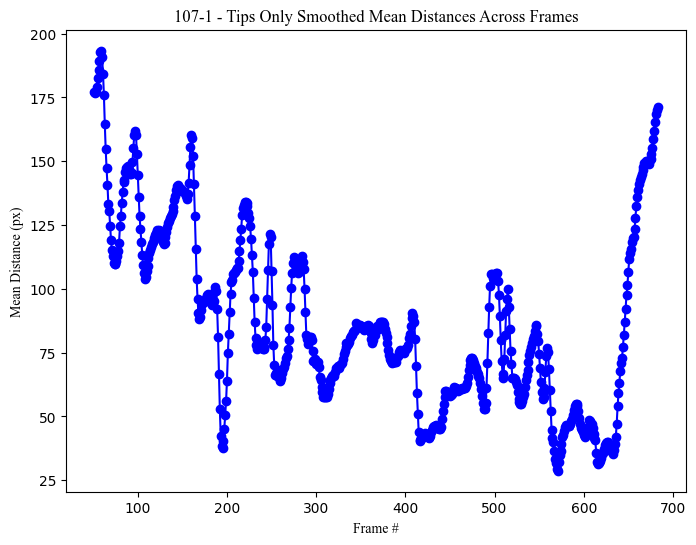

mean: 34.874213836477985
minimum: 24.0
maximum: 234.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 11.377376453381547
Mean FPS: 28.67448151487827
107-2


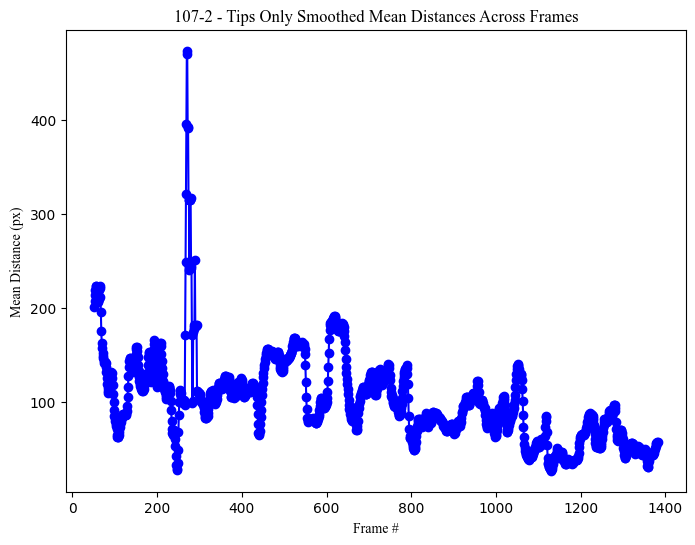

mean: 33.79537953795379
minimum: 23.0
maximum: 101.0
median: 33.5
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 4.517408034592452
Mean FPS: 29.589843750000004
108-0


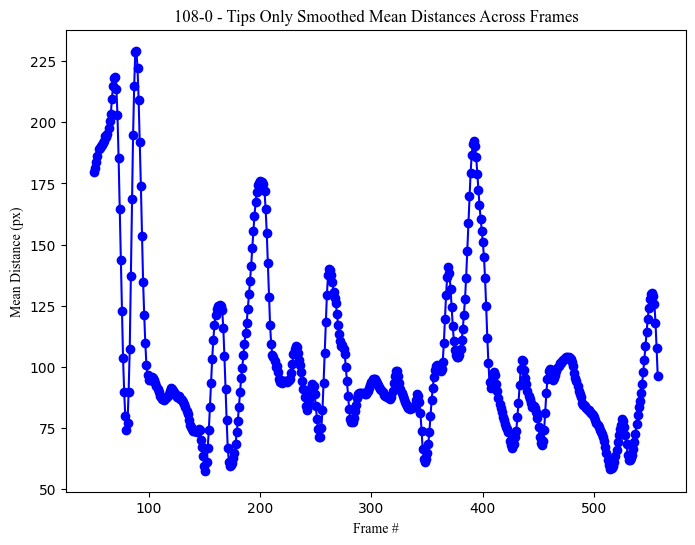

mean: 35.223181257706536
minimum: 26.0
maximum: 398.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 18.012552281524197
Mean FPS: 28.39039417489323
108-1


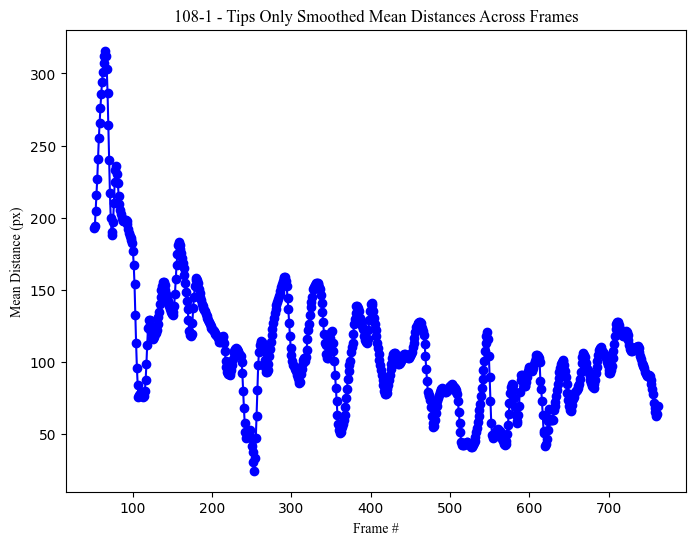

mean: 33.660606060606064
minimum: 27.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 4.330997463244459
Mean FPS: 29.708318329132155
108-2


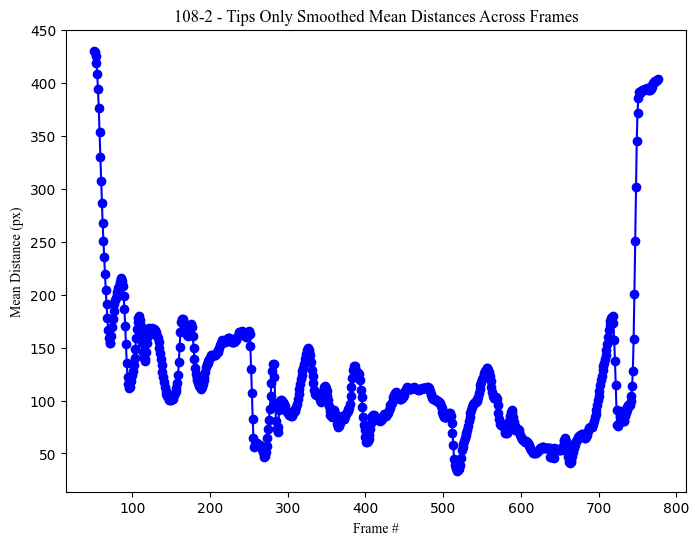

mean: 33.817843866171
minimum: 27.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.700739111826935
Mean FPS: 29.570187974057383
205-0


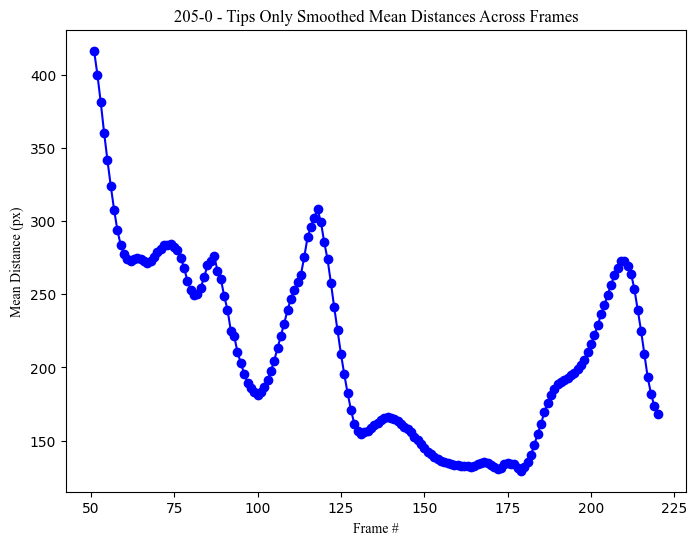

mean: 34.252252252252255
minimum: 25.0
maximum: 71.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 6.273738297431372
Mean FPS: 29.195160441872698
205-1


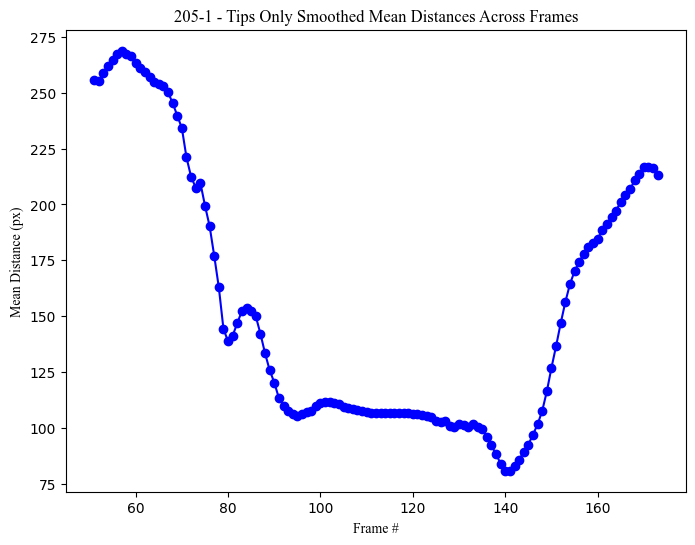

mean: 34.661417322834644
minimum: 22.0
maximum: 102.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 7.621168687571764
Mean FPS: 28.850522489777376
205-2


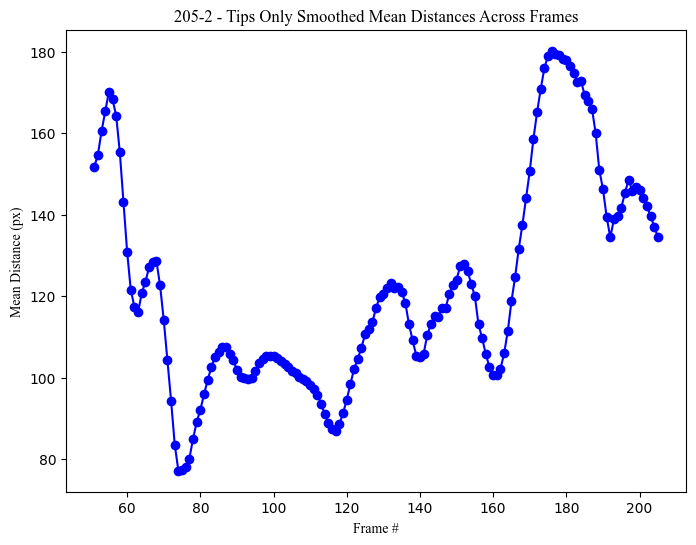

mean: 34.55339805825243
minimum: 24.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 8.223490099955972
Mean FPS: 28.940713683618995
206-0


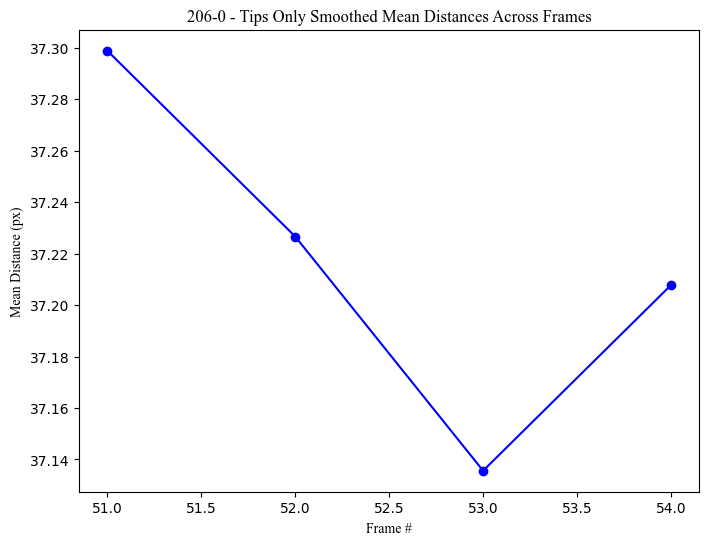

mean: 35.53846153846154
minimum: 21.0
maximum: 166.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 13.174073516485
Mean FPS: 28.138528138528137
206-1


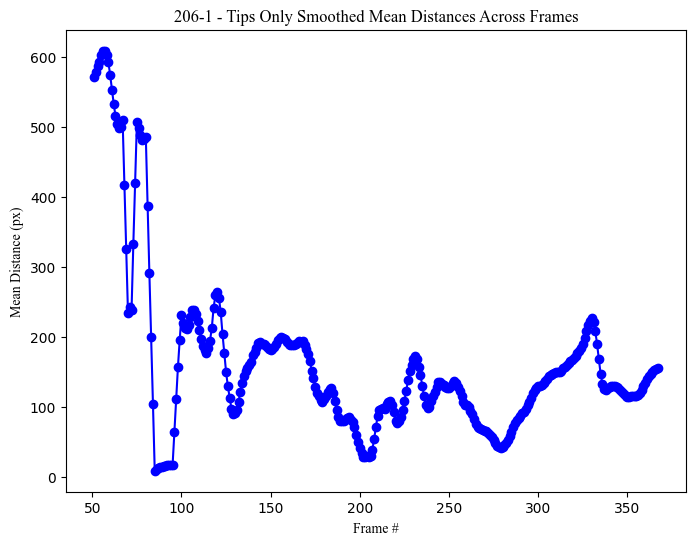

mean: 34.148148148148145
minimum: 17.0
maximum: 266.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 10.648714540701919
Mean FPS: 29.28416485900217
206-2


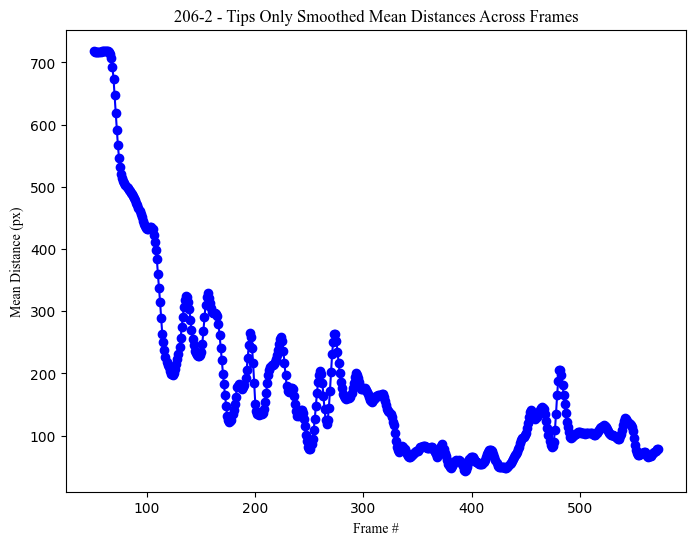

mean: 33.41608391608391
minimum: 19.0
maximum: 59.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 3.2048291871536954
Mean FPS: 29.925708904467932
208-0


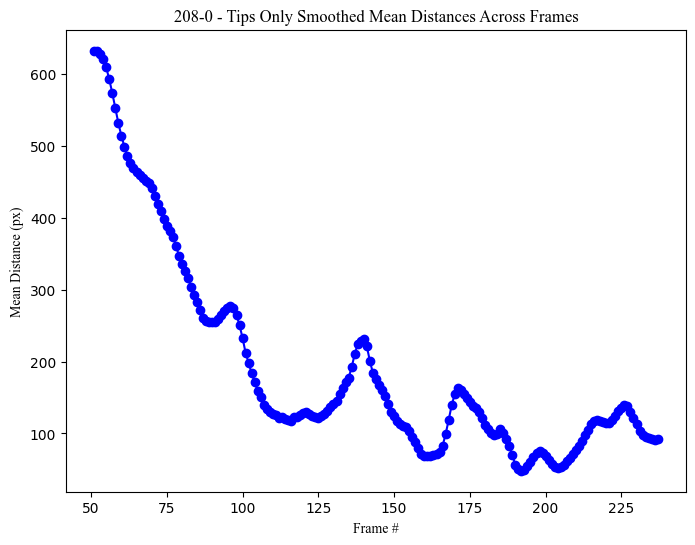

mean: 33.71212121212121
minimum: 23.0
maximum: 71.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 5.03552576628135
Mean FPS: 29.662921348314608
208-1


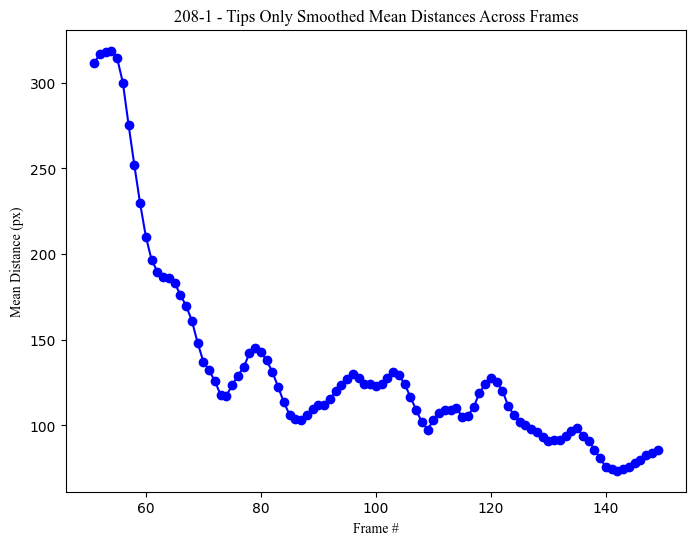

mean: 35.843283582089555
minimum: 21.0
maximum: 165.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 12.583069932237569
Mean FPS: 27.89922964813658
208-2


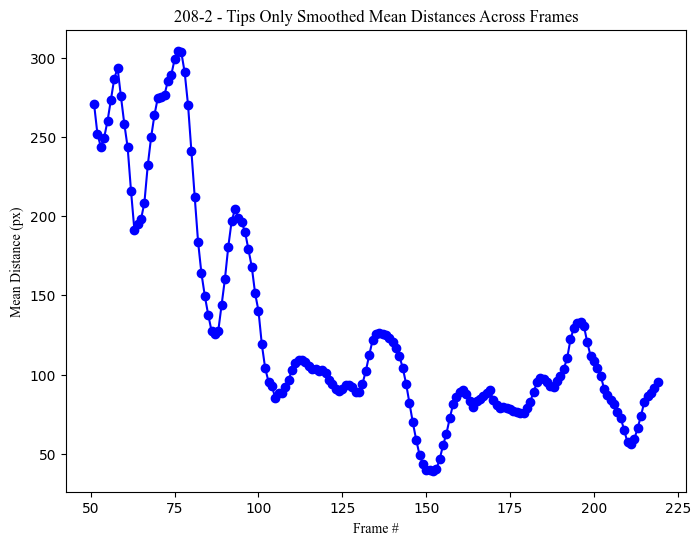

mean: 34.09869036482694
minimum: 22.0
maximum: 141.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 7.079667467900151
Mean FPS: 29.32663950729051
210-0


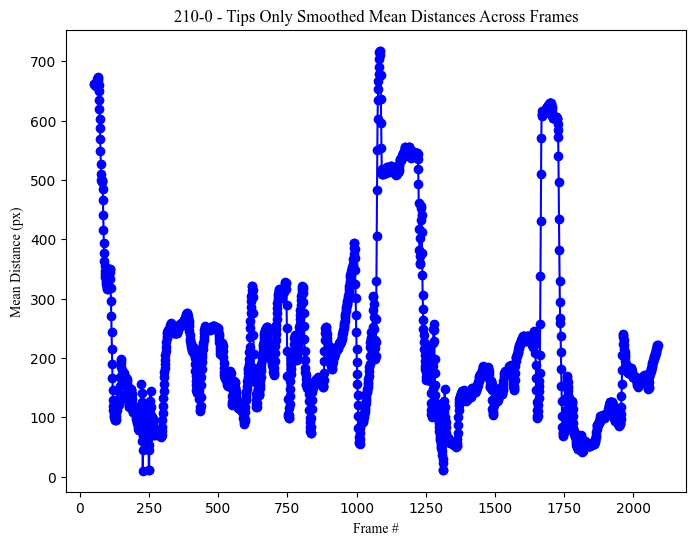

mean: 34.27028639618138
minimum: 21.0
maximum: 143.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 7.900657062435751
Mean FPS: 29.179796994968402
210-1


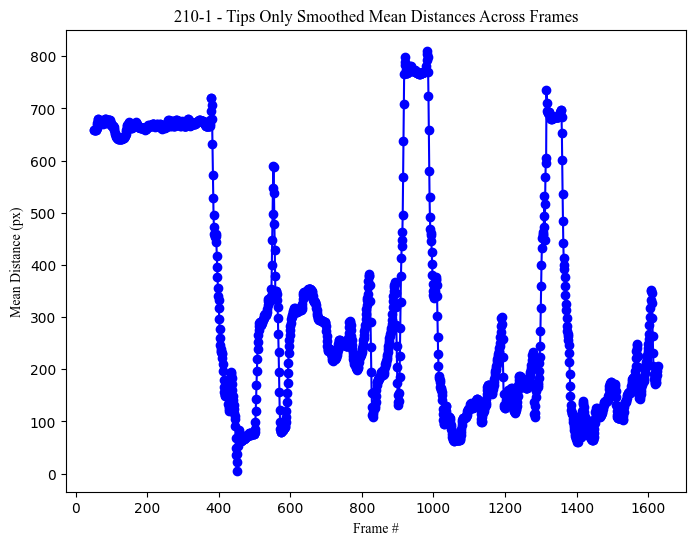

mean: 35.09161576901721
minimum: 23.0
maximum: 533.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 17.602588702755465
Mean FPS: 28.496835443037977
210-2


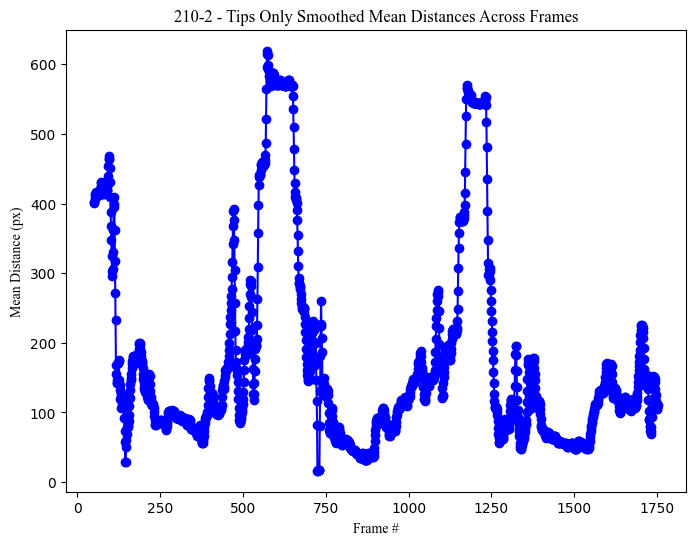

mean: 237.99242424242425
minimum: 220.0
maximum: 327.0
median: 237.0
Q1: 235.75
Q3: 239.0
IQR: 3.25
STD: 9.33914554858174
Mean FPS: 4.201814419863123
300-0


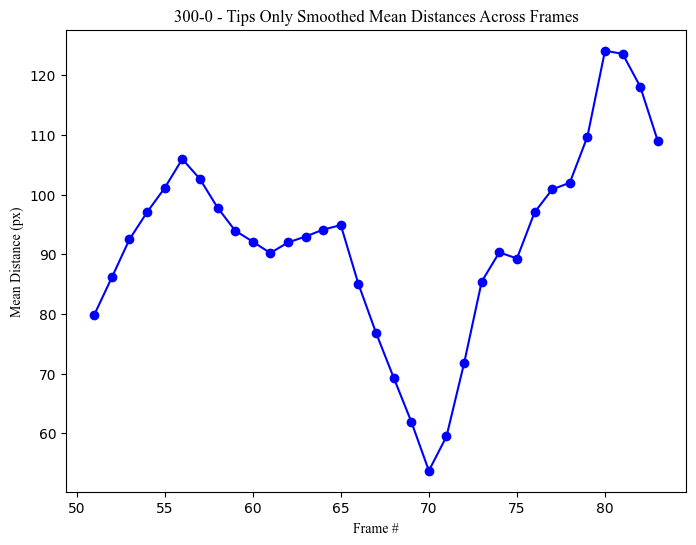

mean: 239.03468208092485
minimum: 216.0
maximum: 324.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 7.8673217113887075
Mean FPS: 4.183493337847315
300-1


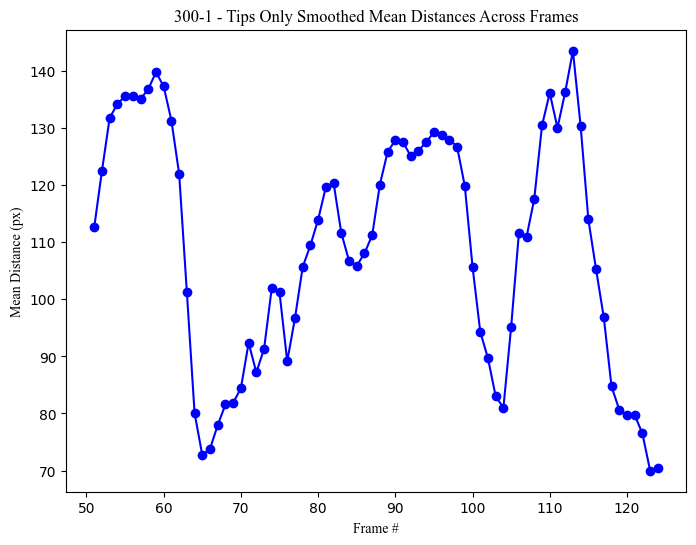

mean: 255.62589928057554
minimum: 222.0
maximum: 737.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 67.83096567768172
Mean FPS: 3.911966677924125
300-2


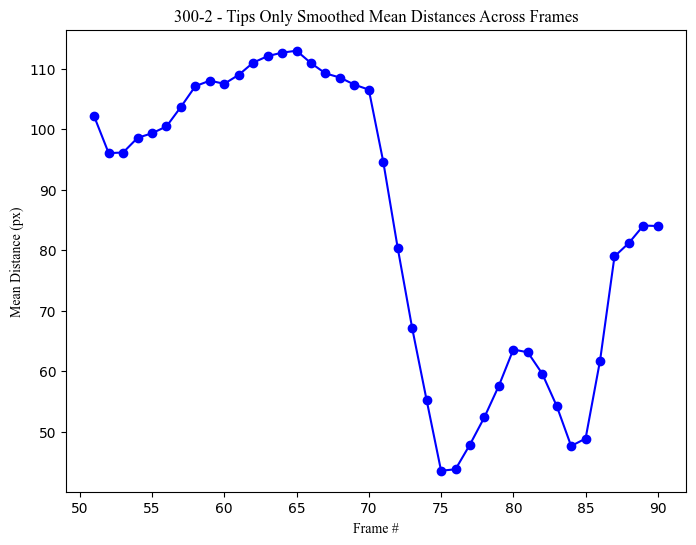

mean: 255.9
minimum: 215.0
maximum: 477.0
median: 237.0
Q1: 234.75
Q3: 243.25
IQR: 8.5
STD: 50.373008645503795
Mean FPS: 3.9077764751856194
301-0


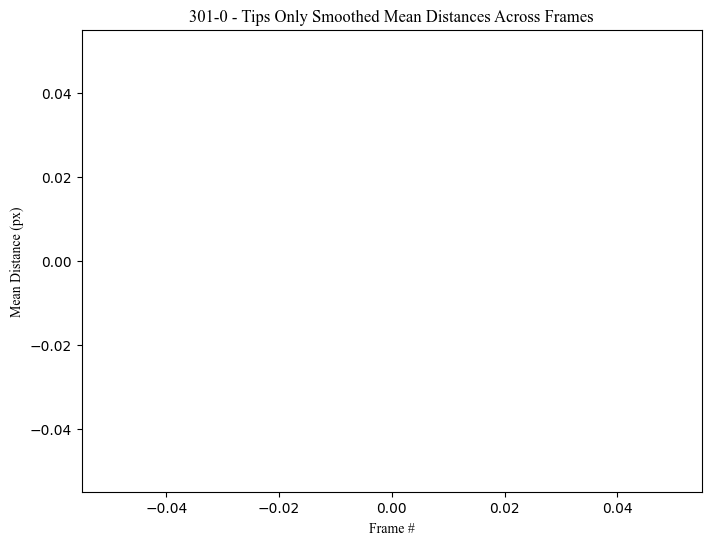

mean: 240.6888888888889
minimum: 146.0
maximum: 475.0
median: 237.0
Q1: 235.0
Q3: 240.0
IQR: 5.0
STD: 29.925207178754135
Mean FPS: 4.154741021143015
301-1


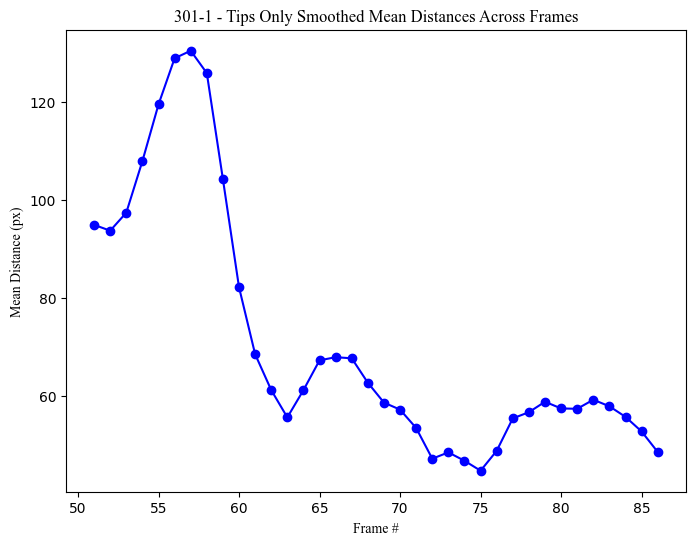

mean: 242.84530386740332
minimum: 214.0
maximum: 482.0
median: 237.0
Q1: 235.0
Q3: 240.0
IQR: 5.0
STD: 36.05579382015583
Mean FPS: 4.117847798885223
301-2


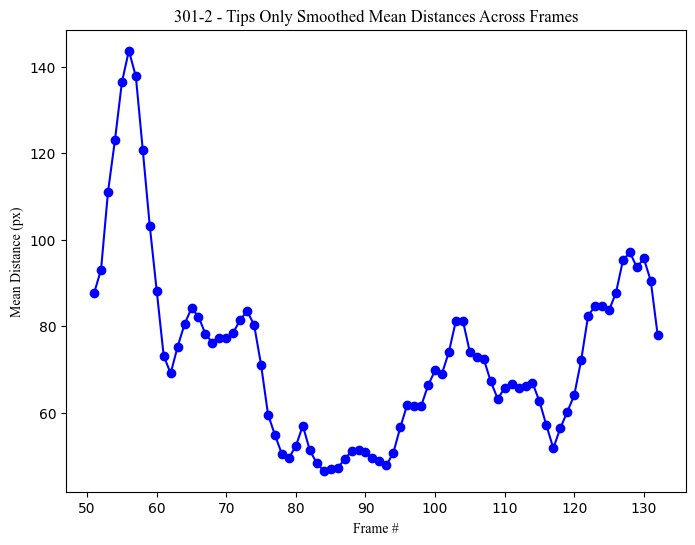

mean: 239.8716216216216
minimum: 149.0
maximum: 474.0
median: 238.0
Q1: 235.0
Q3: 241.0
IQR: 6.0
STD: 29.63933662801382
Mean FPS: 4.168896650798569
302-0


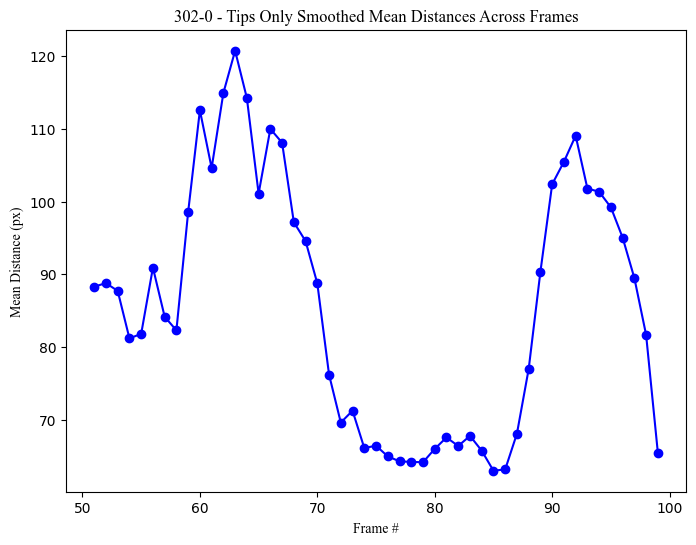

mean: 250.6046511627907
minimum: 207.0
maximum: 475.0
median: 238.0
Q1: 236.0
Q3: 241.0
IQR: 5.0
STD: 50.27620125342817
Mean FPS: 3.990348923533779
302-1


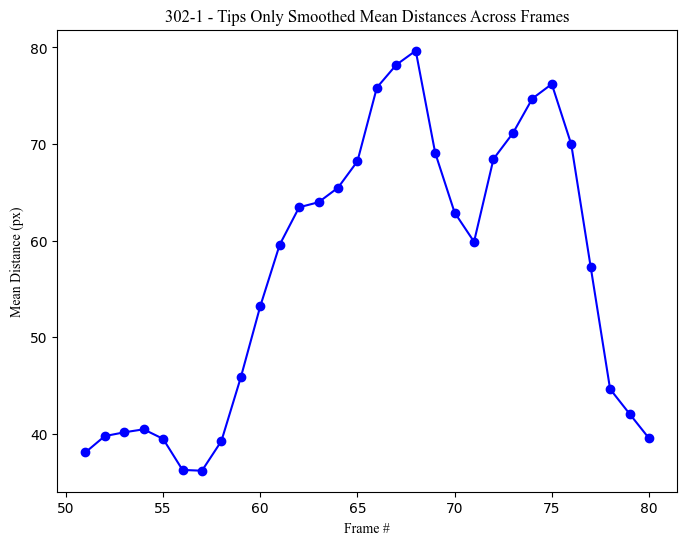

mean: 248.31034482758622
minimum: 200.0
maximum: 711.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 51.32616243647878
Mean FPS: 4.027218441883072
302-2


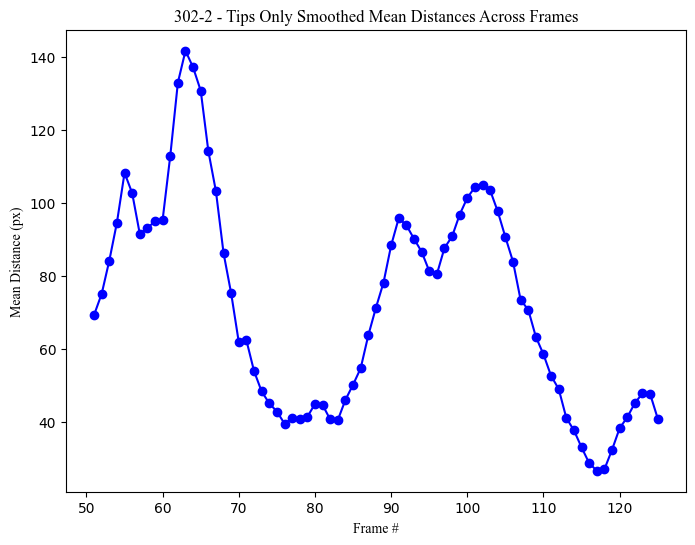

In [69]:
files = get_files()
for f in files:
    dataframe = read_file(f)
    fm, tm, ft = process_frames(dataframe, print=False)
    ft_data = get_statistics(ft)
    print('Mean FPS:', 1000/ft_data['mean'])
    plot_frames(fm,tm, filename=f, plot=(False,False,False,False,True))

mean: 35.324786324786324
minimum: 25.0
maximum: 267.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 13.877770697818779
Mean FPS: 28.308734575368984
sessionData-102-0.csv


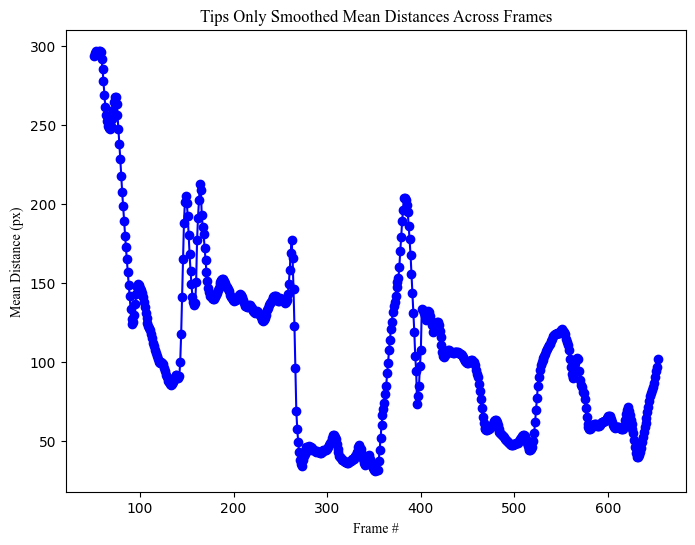

mean: 33.87158469945355
minimum: 26.0
maximum: 100.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 5.635311309439916
Mean FPS: 29.523271759296605
sessionData-102-1.csv


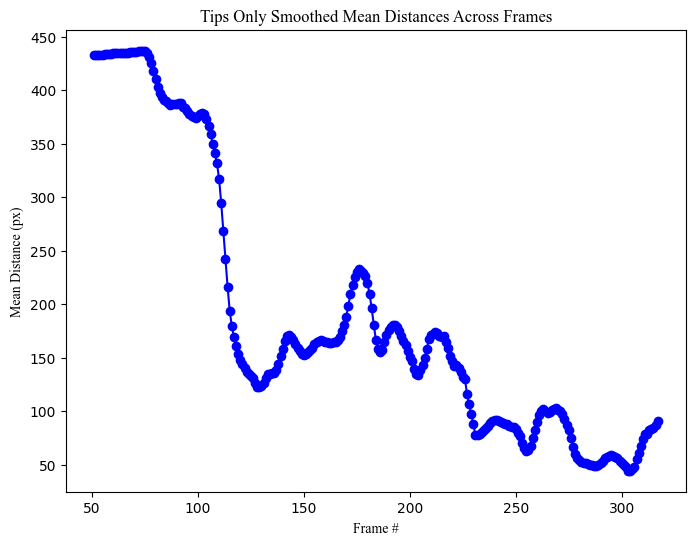

mean: 33.959526159921026
minimum: 26.0
maximum: 133.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.123227875681982
Mean FPS: 29.446818406441675
sessionData-102-2.csv


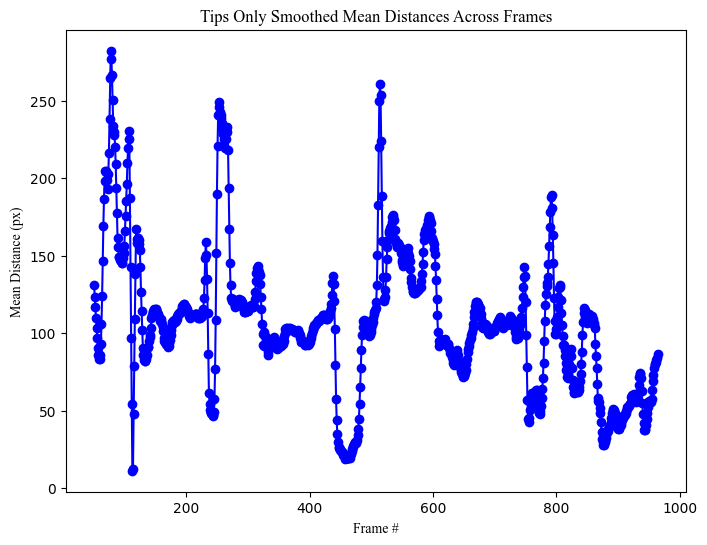

mean: 33.28542914171657
minimum: 26.0
maximum: 40.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.838913825429118
Mean FPS: 30.043175821539936
sessionData-103-0.csv


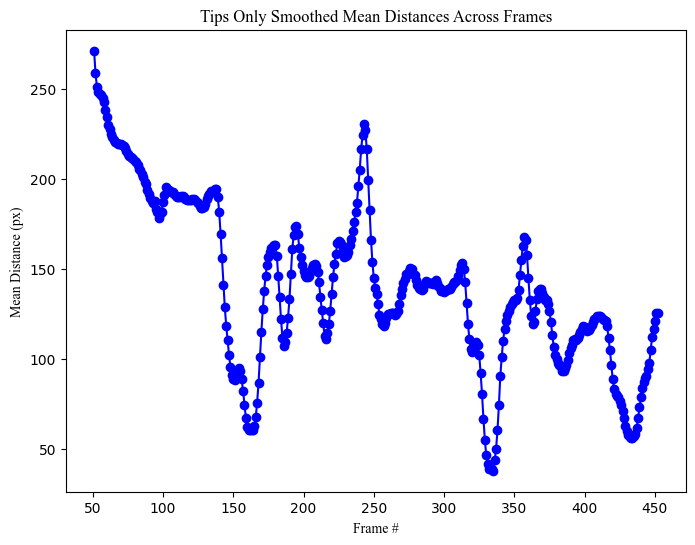

mean: 33.42587601078167
minimum: 23.0
maximum: 71.0
median: 33.0
Q1: 32.5
Q3: 34.0
IQR: 1.5
STD: 2.6045324325440538
Mean FPS: 29.91694218208209
sessionData-103-1.csv


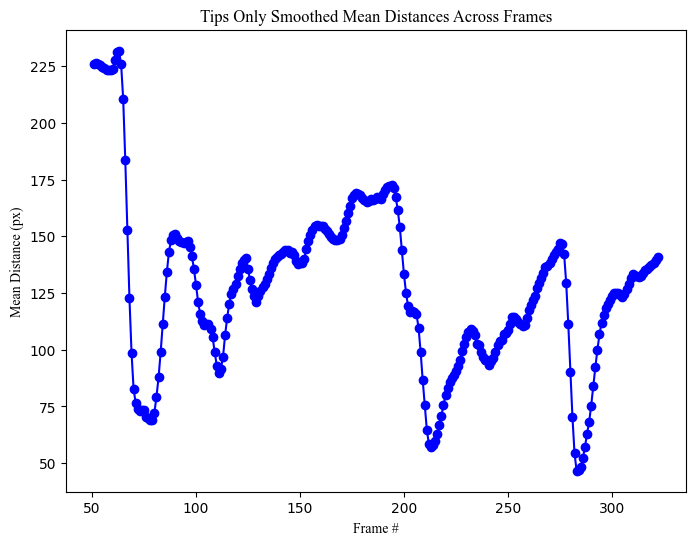

mean: 33.38628762541806
minimum: 26.0
maximum: 67.0
median: 33.0
Q1: 32.25
Q3: 34.0
IQR: 1.75
STD: 2.187593307528739
Mean FPS: 29.95241672927623
sessionData-103-2.csv


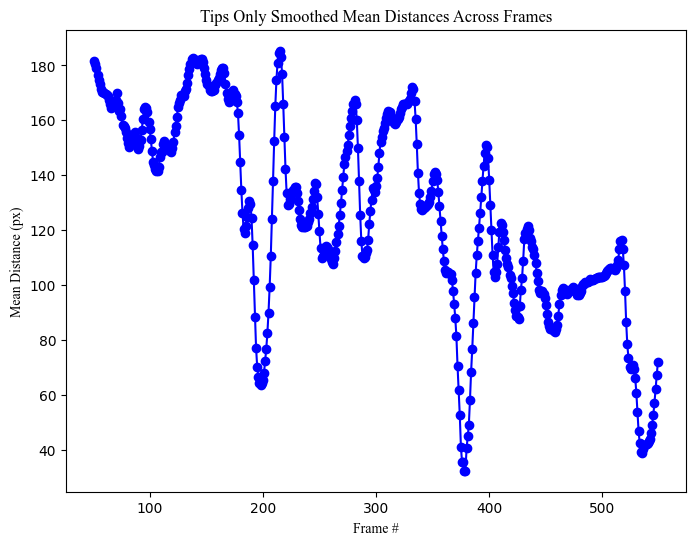

mean: 33.35446685878963
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.487121057119097
Mean FPS: 29.980991878348018
sessionData-104-0.csv


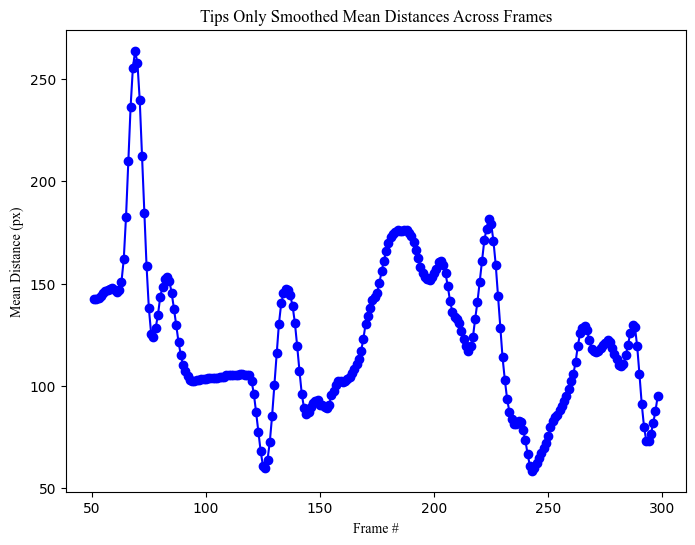

mean: 33.338297872340426
minimum: 25.0
maximum: 42.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.8549592174778697
Mean FPS: 29.995532580254004
sessionData-104-1.csv


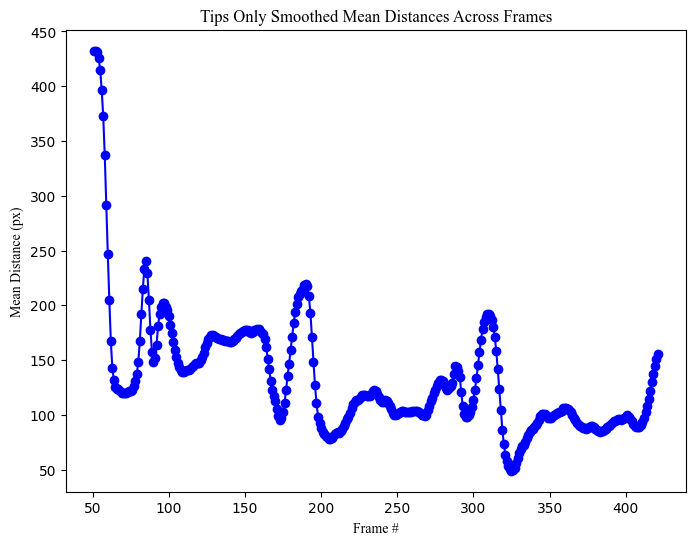

mean: 33.341509433962266
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.4282769619718998
Mean FPS: 29.992643313904136
sessionData-104-2.csv


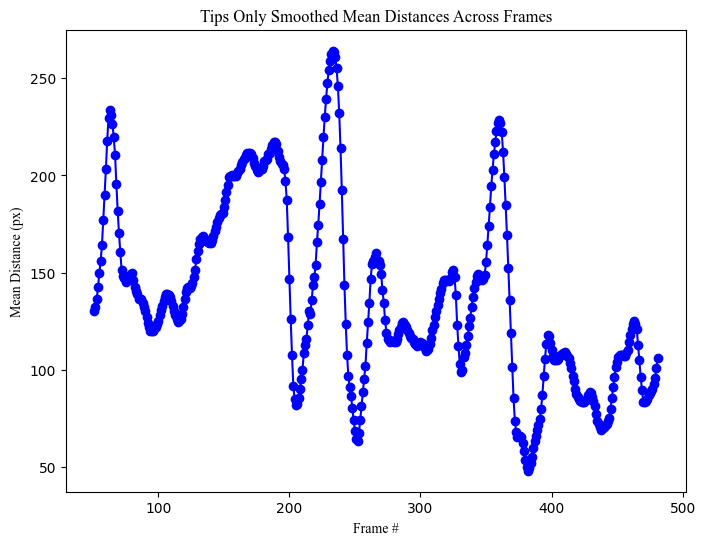

mean: 33.341948310139166
minimum: 25.0
maximum: 41.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 1.5440419000073338
Mean FPS: 29.992248524238267
sessionData-105-0.csv


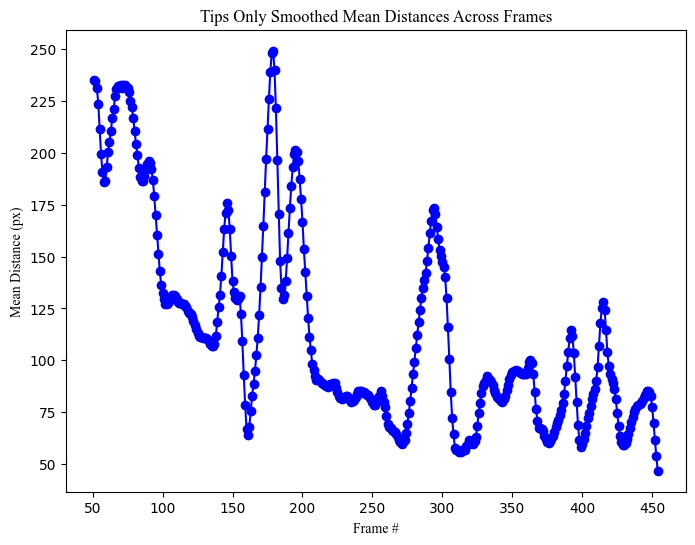

mean: 33.523676880222844
minimum: 26.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 3.9239102585712424
Mean FPS: 29.829663481512252
sessionData-105-1.csv


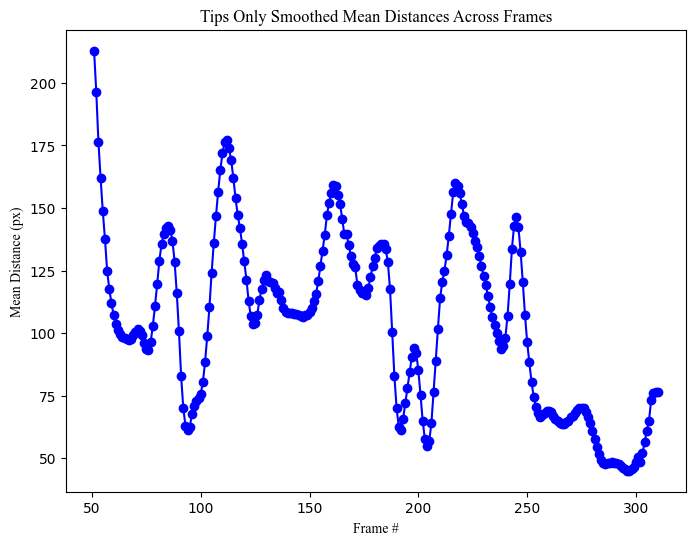

mean: 33.329621380846326
minimum: 25.0
maximum: 42.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 1.7218729350714947
Mean FPS: 30.003341129301702
sessionData-105-2.csv


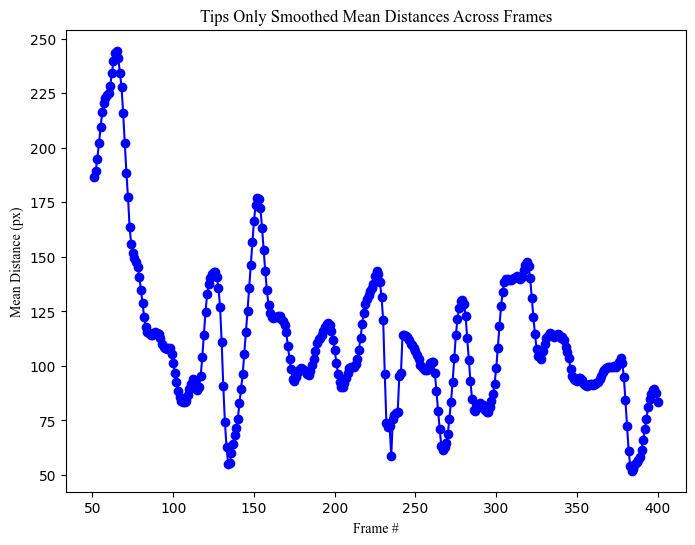

mean: 33.46964285714286
minimum: 26.0
maximum: 68.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 2.6963877716875446
Mean FPS: 29.87782105319319
sessionData-106-0.csv


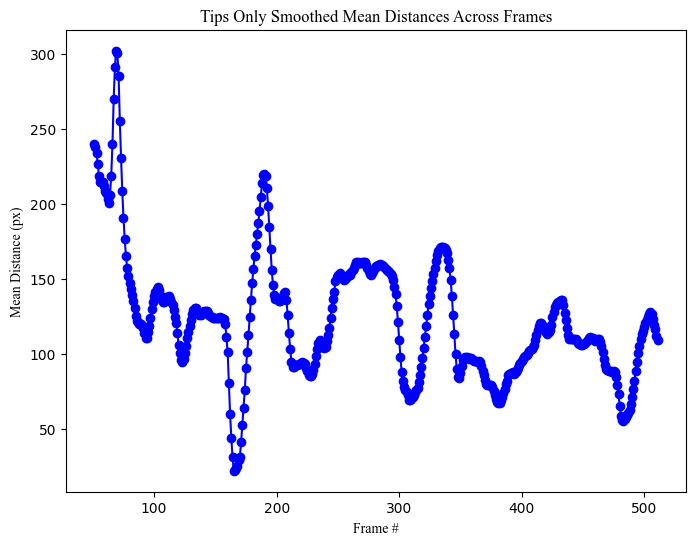

mean: 33.433497536945815
minimum: 23.0
maximum: 68.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 2.513528796711646
Mean FPS: 29.91012229261824
sessionData-106-1.csv


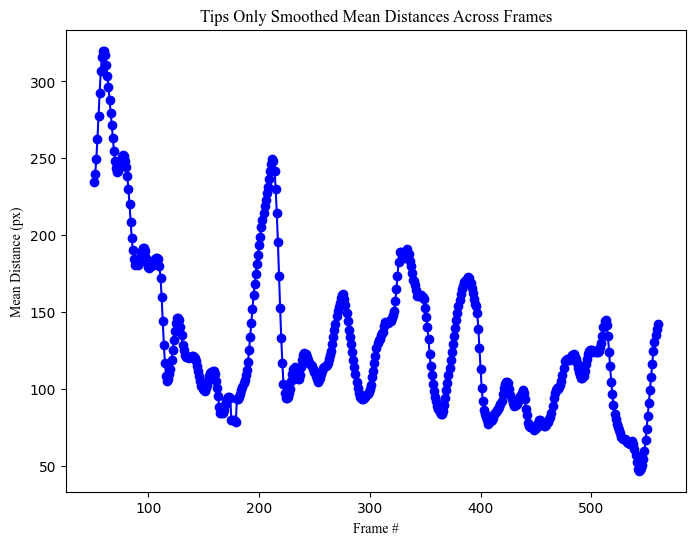

mean: 33.642987249544625
minimum: 27.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 4.19124456063477
Mean FPS: 29.723876556578237
sessionData-106-2.csv


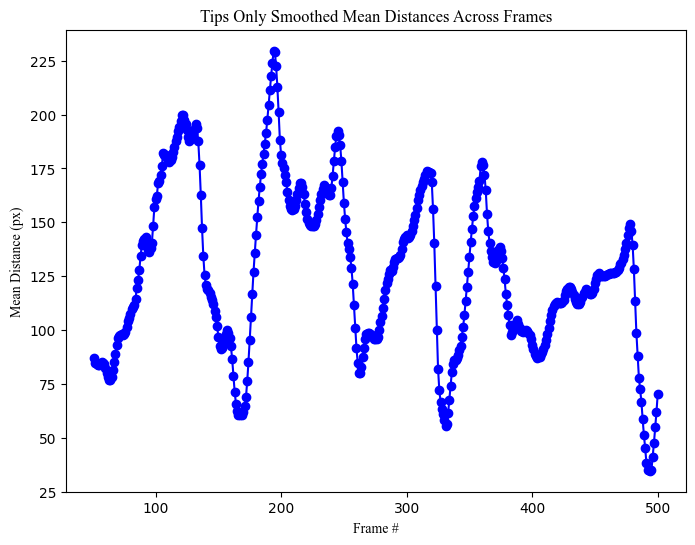

mean: 34.23831775700935
minimum: 24.0
maximum: 233.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 10.272194069517681
Mean FPS: 29.2070424457486
sessionData-107-0.csv


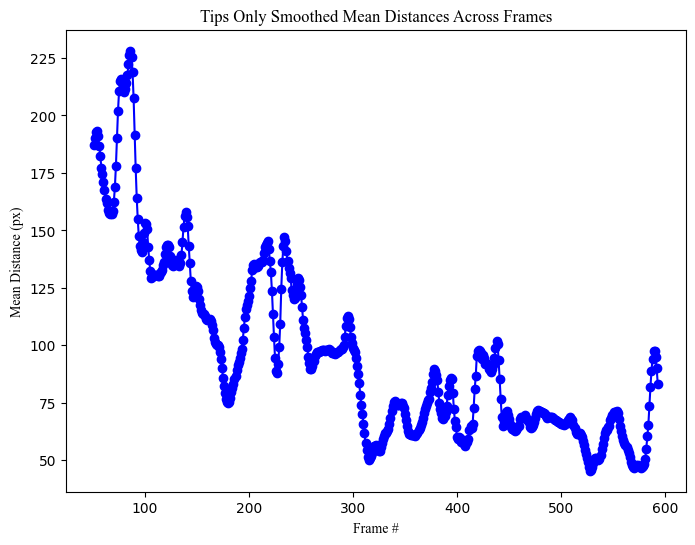

mean: 34.06284153005465
minimum: 26.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.198350442646814
Mean FPS: 29.357503810058553
sessionData-107-1.csv


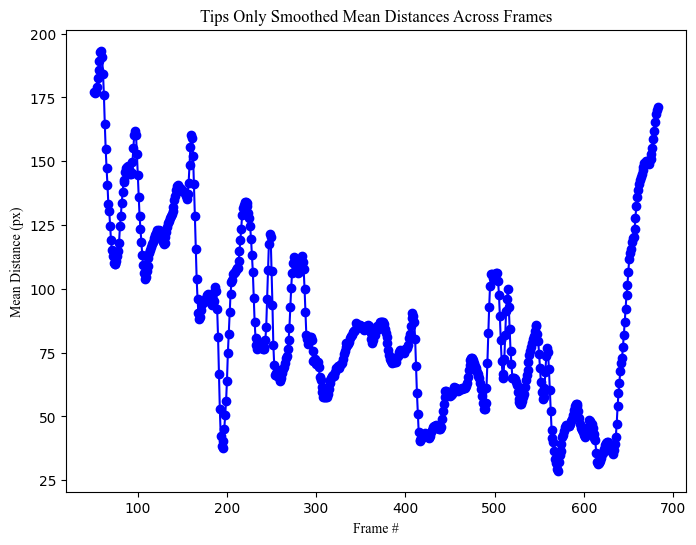

mean: 34.874213836477985
minimum: 24.0
maximum: 234.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 11.377376453381547
Mean FPS: 28.67448151487827
sessionData-107-2.csv


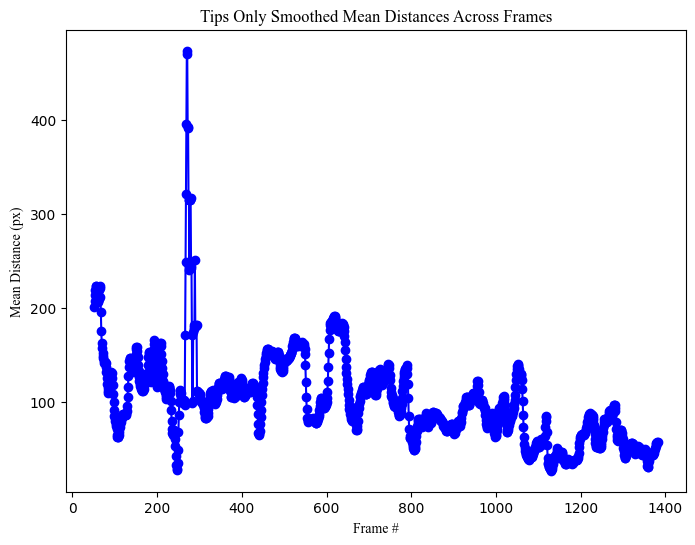

mean: 33.79537953795379
minimum: 23.0
maximum: 101.0
median: 33.5
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 4.517408034592452
Mean FPS: 29.589843750000004
sessionData-108-0.csv


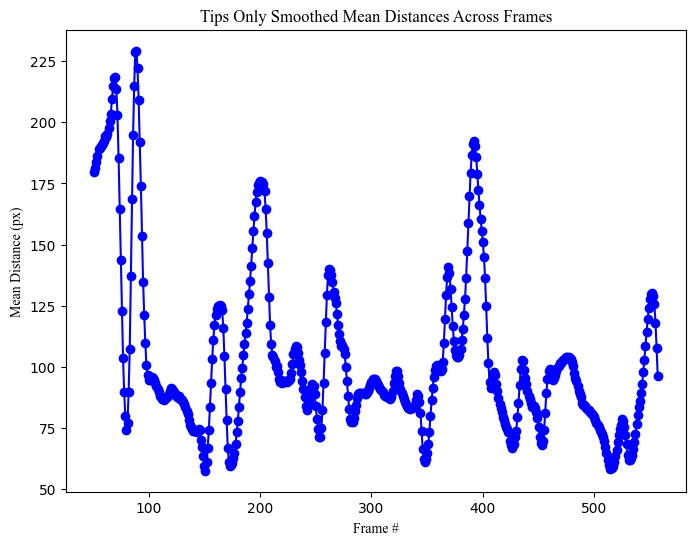

mean: 35.223181257706536
minimum: 26.0
maximum: 398.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 18.012552281524197
Mean FPS: 28.39039417489323
sessionData-108-1.csv


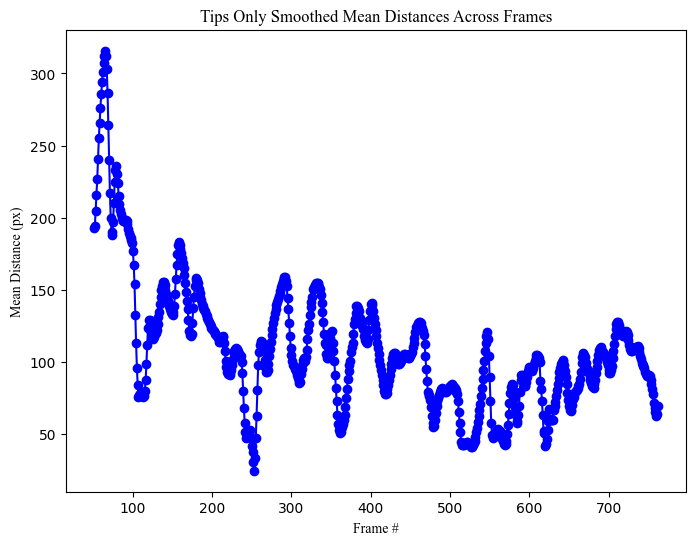

mean: 33.660606060606064
minimum: 27.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 4.330997463244459
Mean FPS: 29.708318329132155
sessionData-108-2.csv


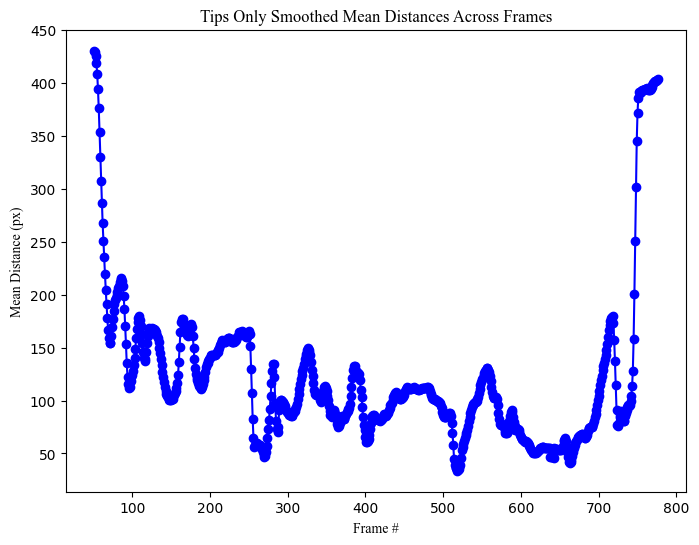

mean: 33.817843866171
minimum: 27.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
STD: 6.700739111826935
Mean FPS: 29.570187974057383
sessionData-205-0.csv


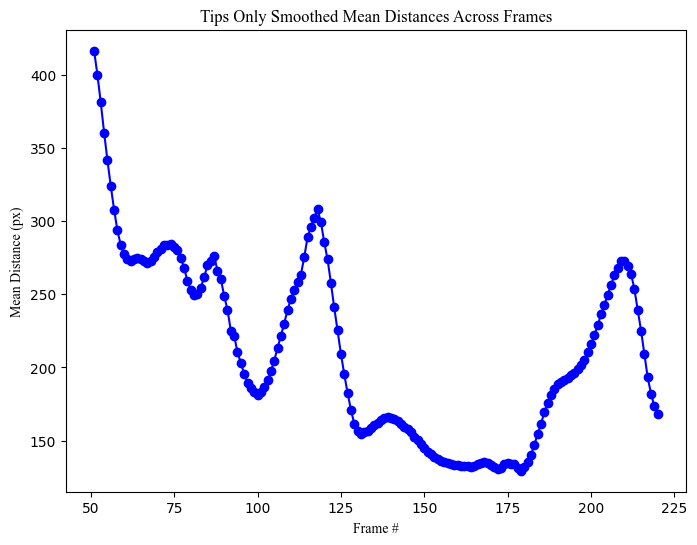

mean: 34.252252252252255
minimum: 25.0
maximum: 71.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 6.273738297431372
Mean FPS: 29.195160441872698
sessionData-205-1.csv


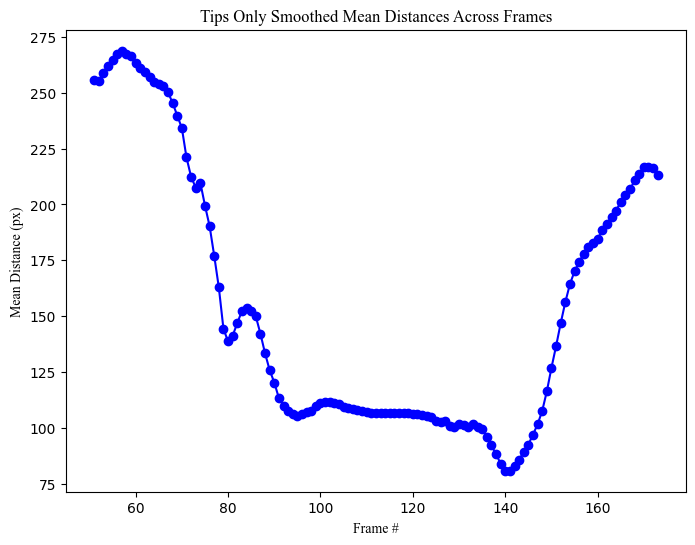

mean: 34.661417322834644
minimum: 22.0
maximum: 102.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 7.621168687571764
Mean FPS: 28.850522489777376
sessionData-205-2.csv


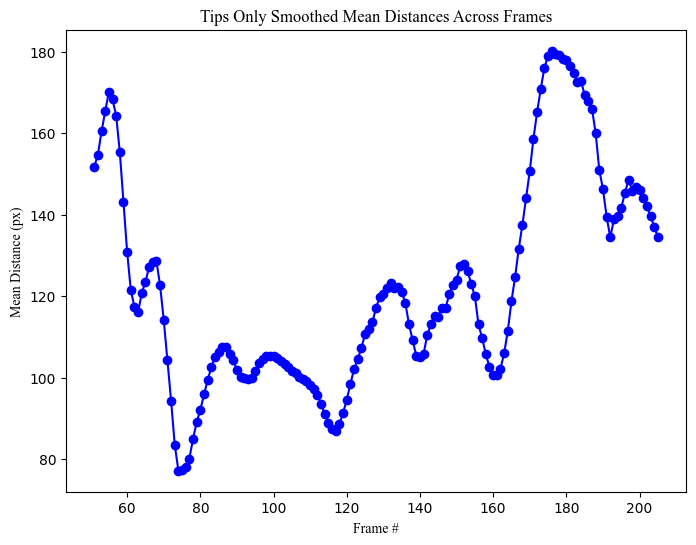

mean: 34.55339805825243
minimum: 24.0
maximum: 100.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 8.223490099955972
Mean FPS: 28.940713683618995
sessionData-206-0.csv


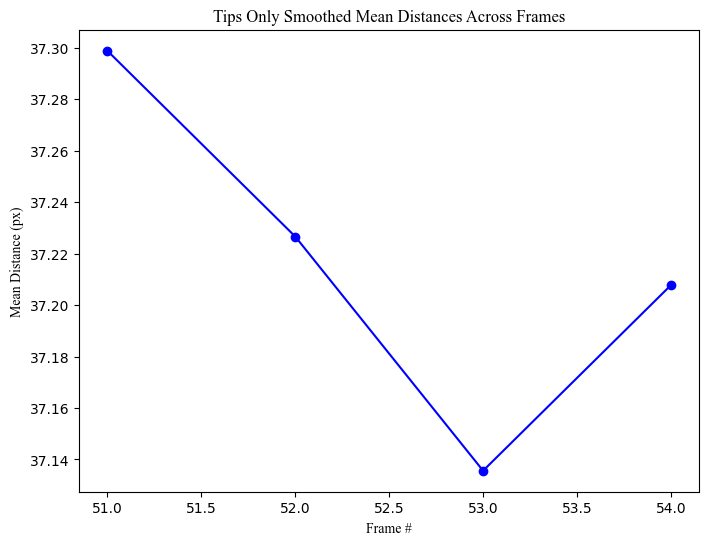

mean: 35.53846153846154
minimum: 21.0
maximum: 166.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 13.174073516485
Mean FPS: 28.138528138528137
sessionData-206-1.csv


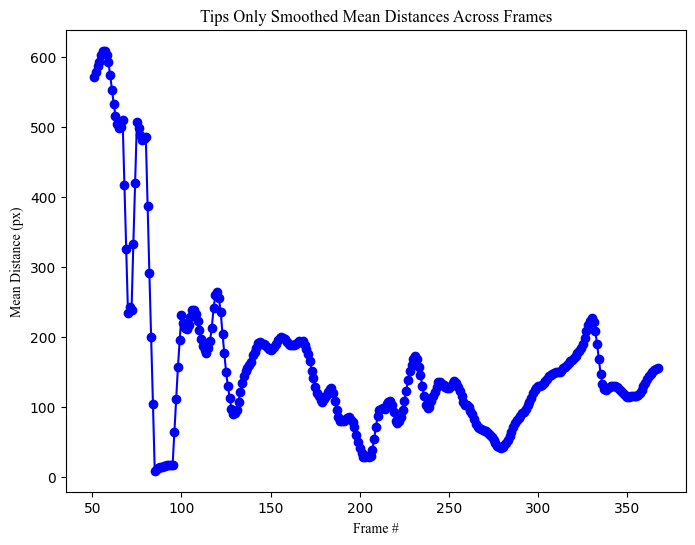

mean: 34.148148148148145
minimum: 17.0
maximum: 266.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 10.648714540701919
Mean FPS: 29.28416485900217
sessionData-206-2.csv


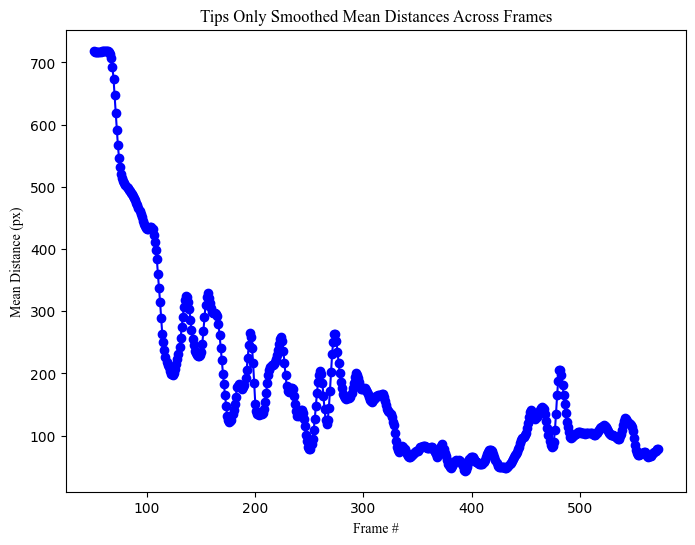

mean: 33.41608391608391
minimum: 19.0
maximum: 59.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 3.2048291871536954
Mean FPS: 29.925708904467932
sessionData-208-0.csv


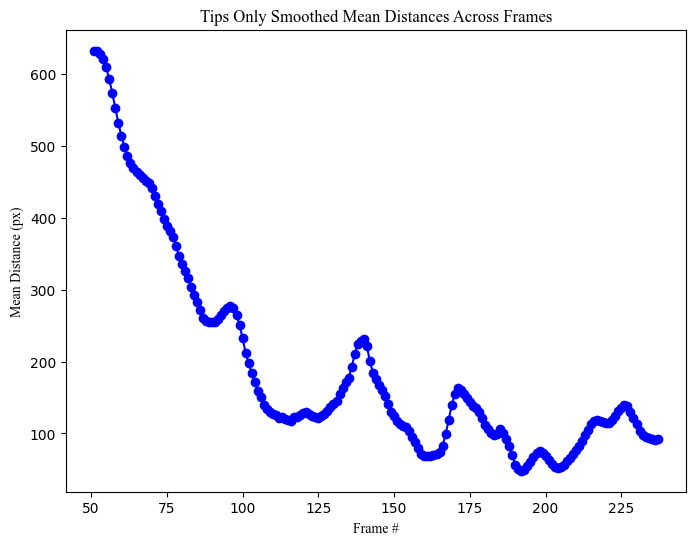

mean: 33.71212121212121
minimum: 23.0
maximum: 71.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 5.03552576628135
Mean FPS: 29.662921348314608
sessionData-208-1.csv


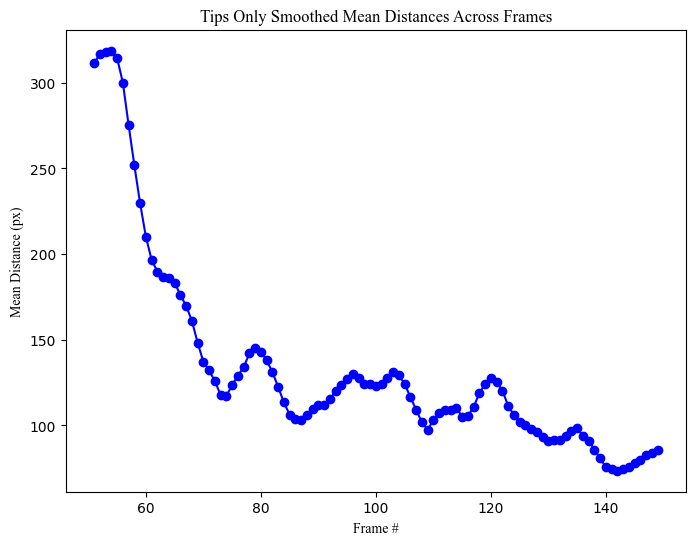

mean: 35.843283582089555
minimum: 21.0
maximum: 165.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 12.583069932237569
Mean FPS: 27.89922964813658
sessionData-208-2.csv


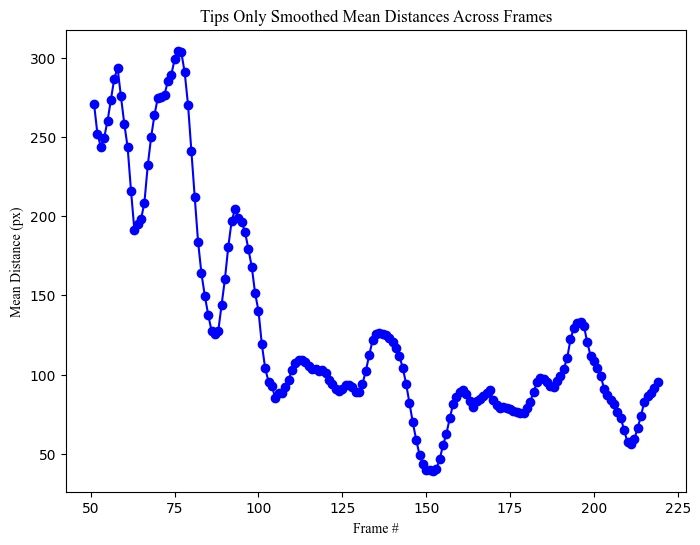

mean: 34.09869036482694
minimum: 22.0
maximum: 141.0
median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
STD: 7.079667467900151
Mean FPS: 29.32663950729051
sessionData-210-0.csv


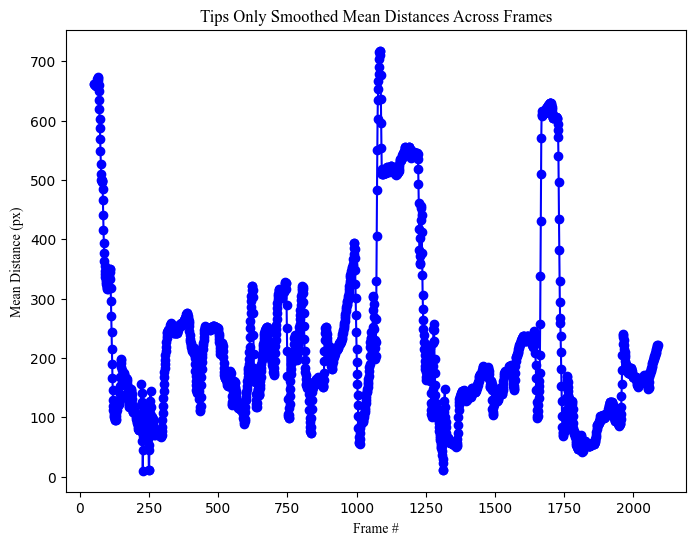

mean: 34.27028639618138
minimum: 21.0
maximum: 143.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 7.900657062435751
Mean FPS: 29.179796994968402
sessionData-210-1.csv


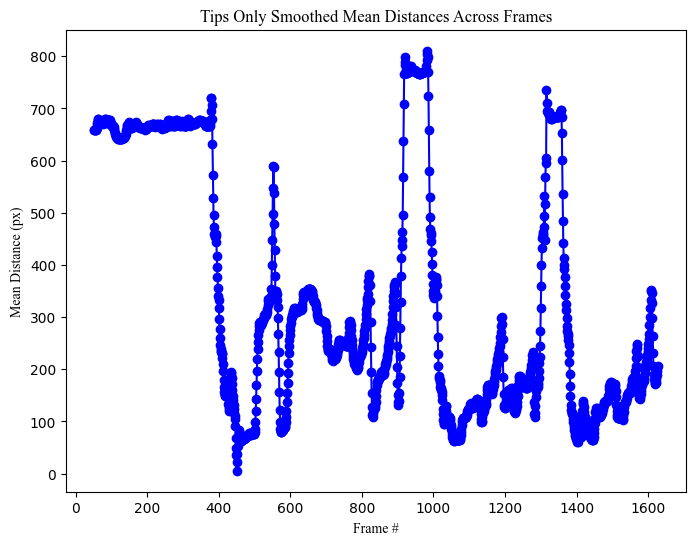

mean: 35.09161576901721
minimum: 23.0
maximum: 533.0
median: 33.0
Q1: 32.0
Q3: 35.0
IQR: 3.0
STD: 17.602588702755465
Mean FPS: 28.496835443037977
sessionData-210-2.csv


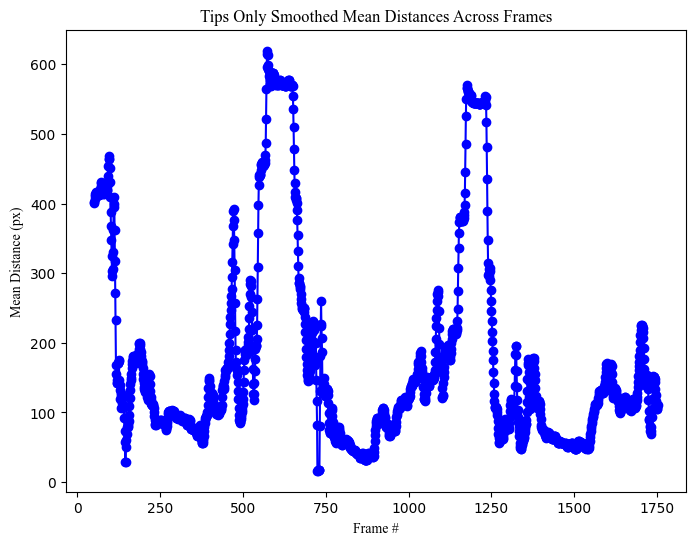

mean: 237.99242424242425
minimum: 220.0
maximum: 327.0
median: 237.0
Q1: 235.75
Q3: 239.0
IQR: 3.25
STD: 9.33914554858174
Mean FPS: 4.201814419863123
sessionData-300-0.csv


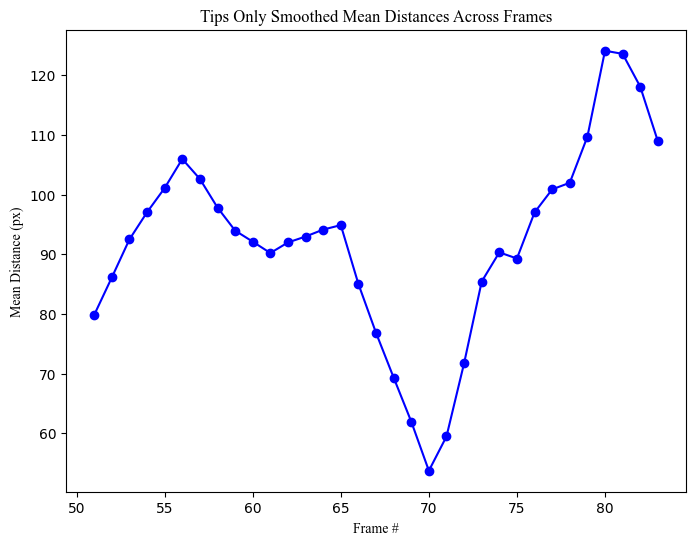

mean: 239.03468208092485
minimum: 216.0
maximum: 324.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 7.8673217113887075
Mean FPS: 4.183493337847315
sessionData-300-1.csv


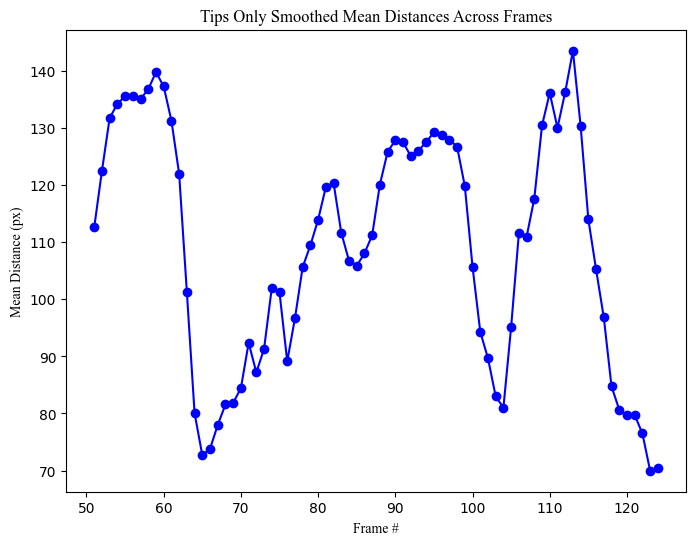

mean: 255.62589928057554
minimum: 222.0
maximum: 737.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 67.83096567768172
Mean FPS: 3.911966677924125
sessionData-300-2.csv


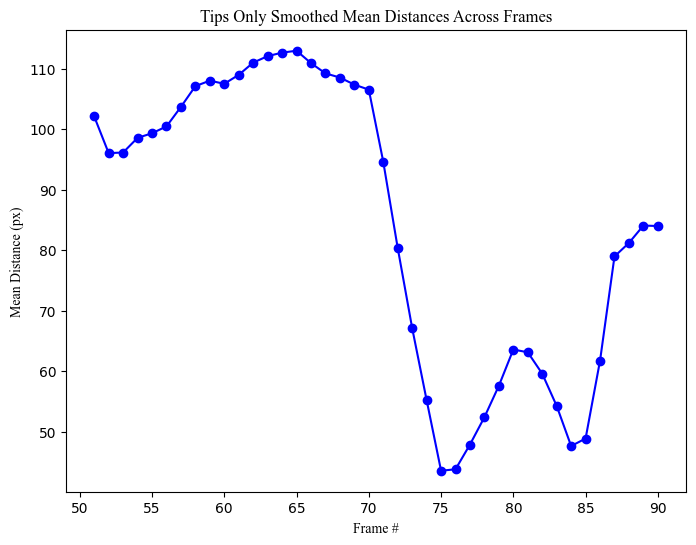

mean: 255.9
minimum: 215.0
maximum: 477.0
median: 237.0
Q1: 234.75
Q3: 243.25
IQR: 8.5
STD: 50.373008645503795
Mean FPS: 3.9077764751856194
sessionData-301-0.csv


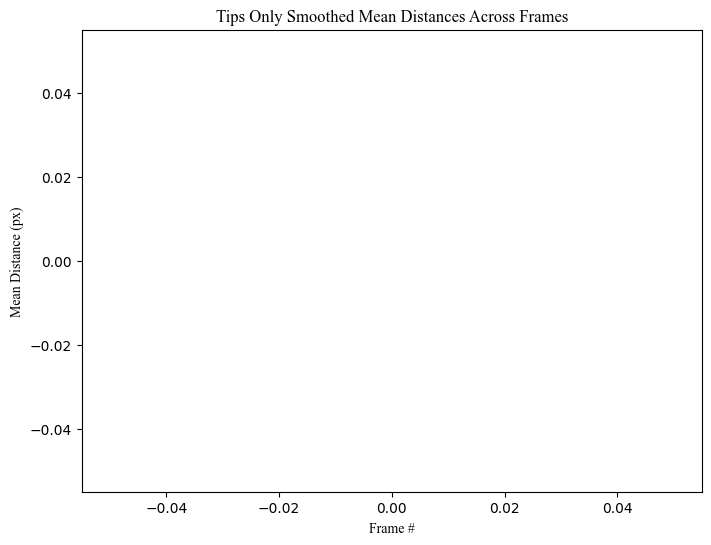

mean: 240.6888888888889
minimum: 146.0
maximum: 475.0
median: 237.0
Q1: 235.0
Q3: 240.0
IQR: 5.0
STD: 29.925207178754135
Mean FPS: 4.154741021143015
sessionData-301-1.csv


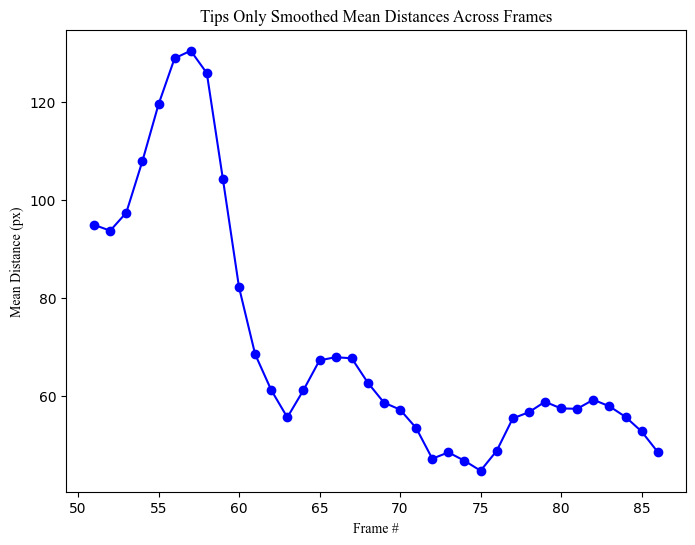

mean: 242.84530386740332
minimum: 214.0
maximum: 482.0
median: 237.0
Q1: 235.0
Q3: 240.0
IQR: 5.0
STD: 36.05579382015583
Mean FPS: 4.117847798885223
sessionData-301-2.csv


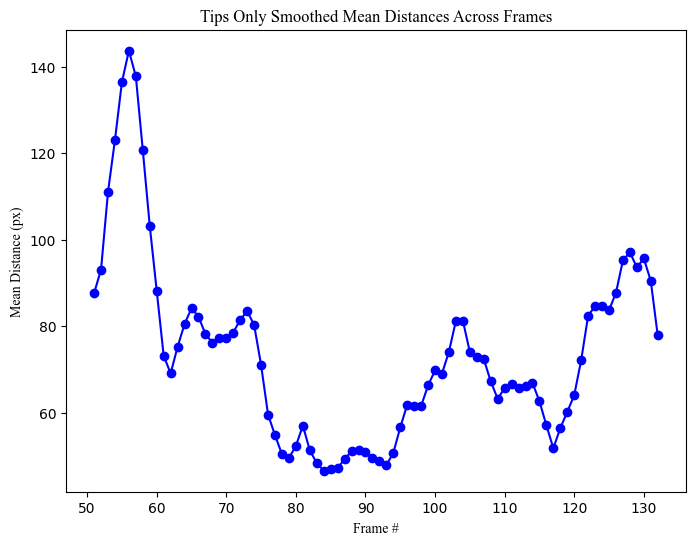

mean: 239.8716216216216
minimum: 149.0
maximum: 474.0
median: 238.0
Q1: 235.0
Q3: 241.0
IQR: 6.0
STD: 29.63933662801382
Mean FPS: 4.168896650798569
sessionData-302-0.csv


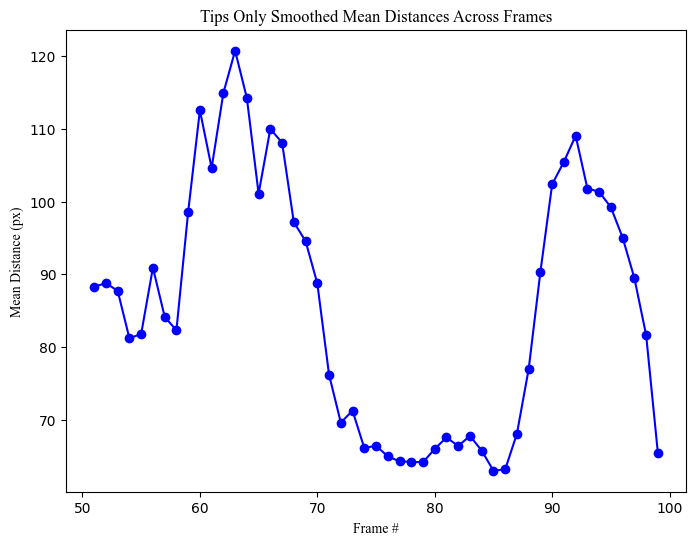

mean: 250.6046511627907
minimum: 207.0
maximum: 475.0
median: 238.0
Q1: 236.0
Q3: 241.0
IQR: 5.0
STD: 50.27620125342817
Mean FPS: 3.990348923533779
sessionData-302-1.csv


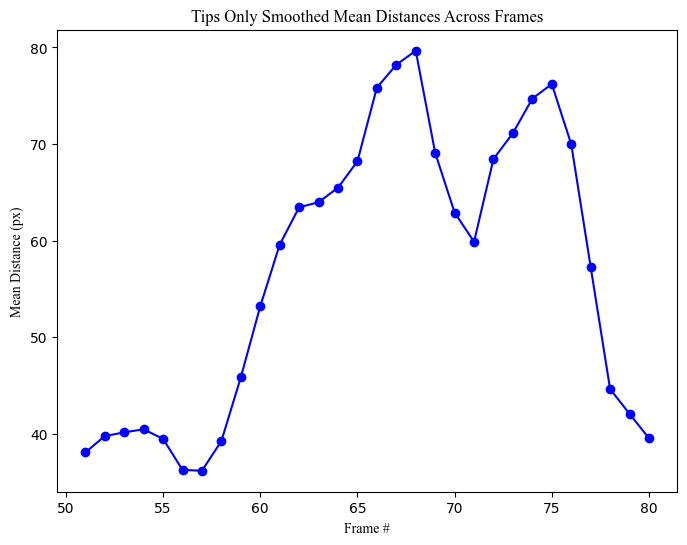

mean: 248.31034482758622
minimum: 200.0
maximum: 711.0
median: 238.0
Q1: 236.0
Q3: 242.0
IQR: 6.0
STD: 51.32616243647878
Mean FPS: 4.027218441883072
sessionData-302-2.csv


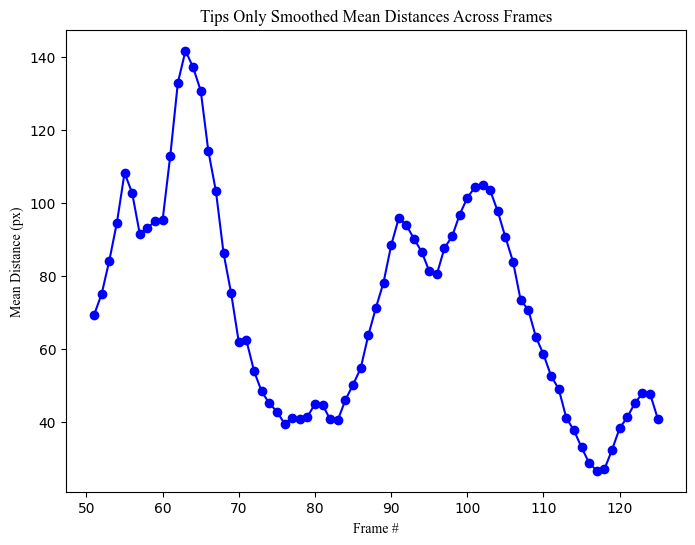

Total iPhone 15 data files: 33
Total iPhone 8 data files: 9
Total files for mode 0: 14
Total files for mode 1: 14
Total files for mode 2: 14



In [52]:
files = get_files()

ip8 = []
ip15 = []

mode0 = []
mode1 = []
mode2 = []

for f in files:
    # print(f)
    if re.search('-3\d\d-', f):
        ip8.append(f)
    else:
        ip15.append(f)
        
    if re.search('-0\.csv', f):
        mode0.append(f)
    elif re.search('-1\.csv', f):
        mode1.append(f)
    elif re.search('-2\.csv', f):
        mode2.append(f)
        
print("Total iPhone 15 data files:", len(ip15))
print("Total iPhone 8 data files:", len(ip8))
print("Total files for mode 0:", len(mode0))
print("Total files for mode 1:", len(mode1))
print("Total files for mode 2:", len(mode2))
print()


mean: 245.65264621913502
minimum: 237.99242424242425
maximum: 255.9
median: 242.84530386740332
Q1: 239.8716216216216
Q3: 250.6046511627907
IQR: 10.733029541169088
STD: 6.703867079452198
Mean FPS: 4.070788633426516
Frametime statistics for all iPhone 8 data:


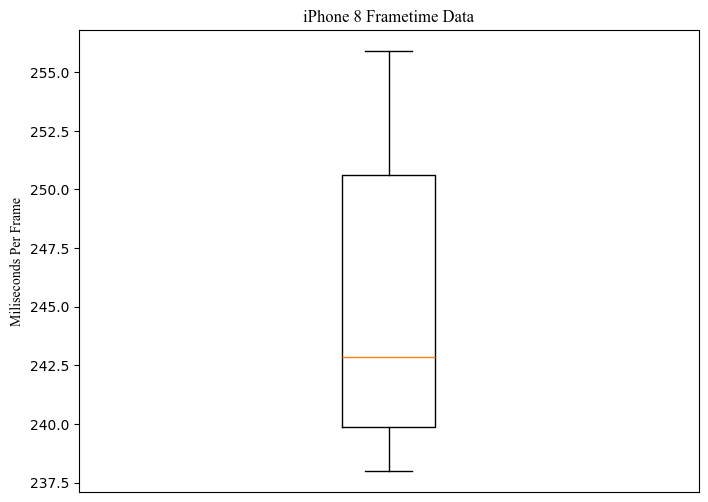

In [34]:
ip8_avg = []

for f in ip8:
    dataframe = read_file(f)
    fm, tm, ft = process_frames(dataframe, print=False)
    ft_data = get_statistics(ft, printData=False)

    ip8_avg.append(ft_data['mean'])

ip8_all_avg = get_statistics(ip8_avg)
print('Mean FPS:', 1000/ip8_all_avg['mean'])
print("Frametime statistics for all iPhone 8 data:")


fig = plt.figure(figsize =(8, 6))
plt.boxplot(ip8_avg)
plt.title("iPhone 8 Frametime Data", **tnr)
plt.ylabel("Miliseconds Per Frame", **tnr)
plt.xticks([])
plt.show()

fig.savefig('../Images/boxPlots/iPhone8Frametimes.png')


mean: 34.03900850752302
minimum: 33.28542914171657
maximum: 35.843283582089555
median: 33.817843866171
Q1: 33.42587601078167
Q3: 34.27028639618138
IQR: 0.844410385399712
STD: 0.7150020028527626
Mean FPS: 29.378058993081076
Frametime statistics for all iPhone 15 Pro Max data:


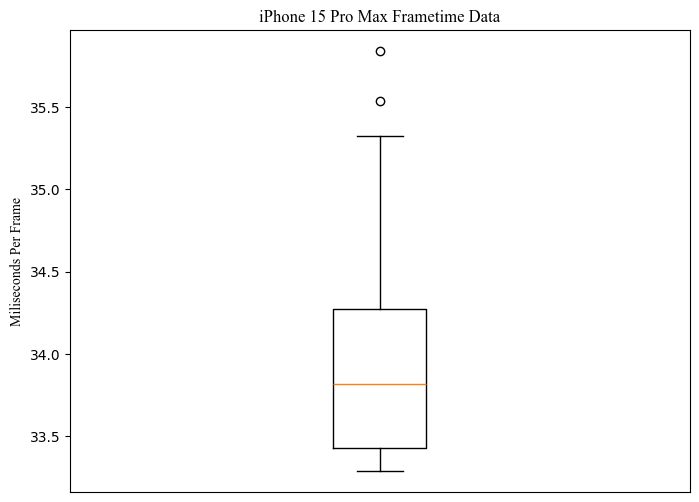

In [35]:
print()
ip15_avg = []
for f in ip15:
    dataframe = read_file(f)
    fm, tm, ft = process_frames(dataframe, print=False)
    ft_data = get_statistics(ft, printData=False)

    ip15_avg.append(ft_data['mean'])

        
ip15_all_avg = get_statistics(ip15_avg)
print('Mean FPS:', 1000/ip15_all_avg['mean'])
print("Frametime statistics for all iPhone 15 Pro Max data:")
        
fig = plt.figure(figsize =(8, 6))
plt.boxplot(ip15_avg)
plt.title("iPhone 15 Pro Max Frametime Data", **tnr)
plt.ylabel("Miliseconds Per Frame", **tnr)
plt.xticks([])
plt.show()

fig.savefig('../Images/boxPlots/iPhone15Frametimes.png')

<Figure size 800x600 with 0 Axes>

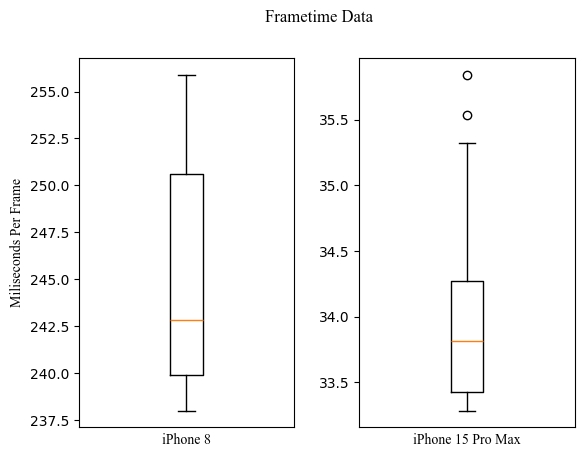

In [36]:
plt.figure(figsize =(8, 6))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(ip8_avg)
ax2.boxplot(ip15_avg)
ax1.set_xlabel("iPhone 8", **tnr)
ax1.set_xticks([])
ax1.set_ylabel("Miliseconds Per Frame", **tnr)
ax2.set_xlabel("iPhone 15 Pro Max", **tnr)
ax2.set_xticks([])

# plt.boxplot([ip8_avg, ip15_avg])
plt.suptitle("Frametime Data", **tnr)
# plt.ylabel("Miliseconds Per Frame")
plt.subplots_adjust(wspace=0.3) 
plt.show()

fig.savefig('../Images/boxPlots/FrametimeBoxPlot.png')

In [37]:
mode0_times = []
for f in mode0:
    # print(f)
    dataframe = read_file(f)
    duration = get_session_time(dataframe).total_seconds()
    mode0_times.append(duration)
    print(f'{f[12:17]}: {duration}')

print()    

mode0_stats = get_statistics(mode0_times)



102-0: 24.798
103-0: 16.676
104-0: 11.574
105-0: 16.771
106-0: 18.743
107-0: 21.981
108-0: 20.48
205-0: 9.097
206-0: 3.559
208-0: 9.557
210-0: 72.903
300-0: 31.415
301-0: 20.472
302-0: 35.501

mean: 22.394785714285714
minimum: 3.559
maximum: 72.903
median: 19.6075
Q1: 12.849499999999999
Q3: 24.09375
IQR: 11.244250000000001
STD: 16.275990389784806


In [38]:
mode1_times = []
for f in mode1:
    # print(f)
    dataframe = read_file(f)
    duration = get_session_time(dataframe).total_seconds()
    mode1_times.append(duration)
    print(f'{f[12:17]}: {duration}')

mode1_stats = get_statistics(mode1_times)

102-1: 12.397
103-1: 12.401
104-1: 15.669
105-1: 12.035
106-1: 20.361
107-1: 24.934
108-1: 28.566
205-1: 7.604
206-1: 14.784
208-1: 6.675
210-1: 57.437
300-1: 41.353
301-1: 32.493
302-1: 32.328
mean: 22.788357142857144
minimum: 6.675
maximum: 57.437
median: 18.015
Q1: 12.398
Q3: 31.387500000000003
IQR: 18.989500000000003
STD: 13.914813379001853


In [39]:
mode2_times = []
for f in mode2:
    # print(f)
    dataframe = read_file(f)
    duration = get_session_time(dataframe).total_seconds()
    mode2_times.append(duration)
    print(f'{f[12:17]}: {duration}')
    
mode2_stats = get_statistics(mode2_times)


102-2: 34.401
103-2: 19.965
104-2: 17.671
105-2: 14.965
106-2: 18.47
107-2: 49.905
108-2: 27.77
205-2: 8.804
206-2: 21.206
208-2: 9.606
210-2: 63.2
300-2: 35.532
301-2: 43.955
302-2: 43.206
mean: 29.18971428571428
minimum: 8.804
maximum: 63.2
median: 24.488
Q1: 17.87075
Q3: 41.2875
IQR: 23.41675
STD: 15.737943251121164


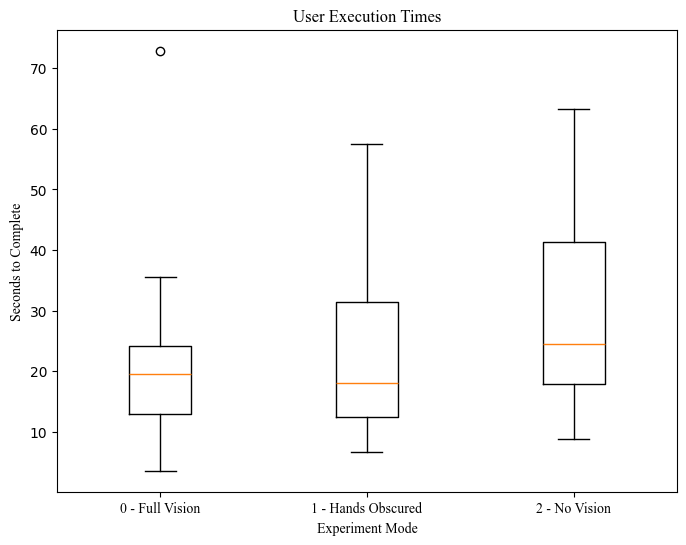

In [40]:
fig = plt.figure(figsize =(8, 6))
plt.boxplot((mode0_times, mode1_times, mode2_times))
plt.title("User Execution Times", **tnr)
plt.ylabel("Seconds to Complete", **tnr)
plt.xticks(np.arange(3)+1, ('0 - Full Vision', '1 - Hands Obscured', '2 - No Vision'), **tnr)
plt.xlabel('Experiment Mode', **tnr)
plt.show()

fig.savefig('../Images/boxPlots/ExecutionBoxPlots.png')

102: (24.798, 12.397, 34.401)


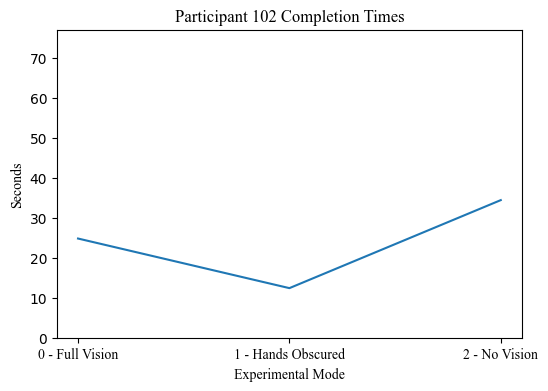

103: (16.676, 12.401, 19.965)


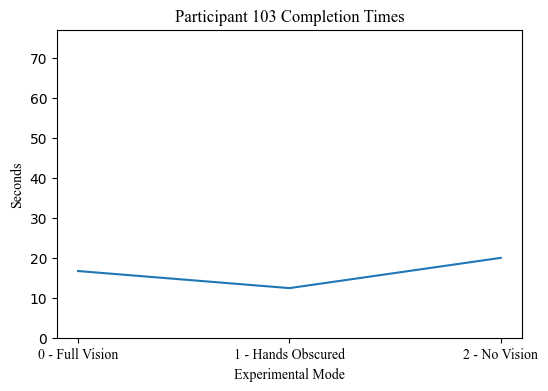

104: (11.574, 15.669, 17.671)


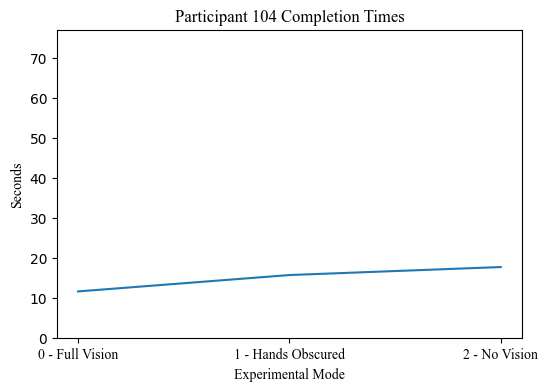

105: (16.771, 12.035, 14.965)


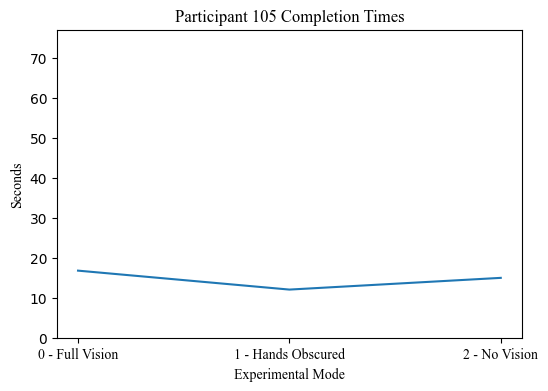

106: (18.743, 20.361, 18.47)


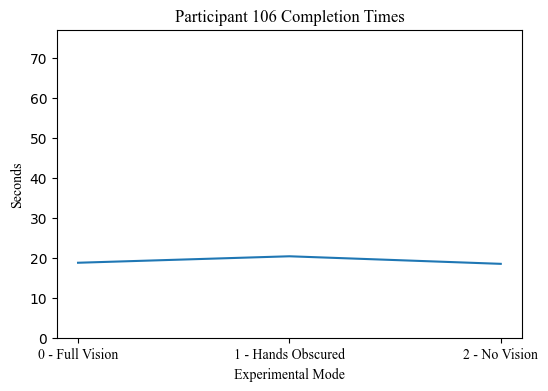

107: (21.981, 24.934, 49.905)


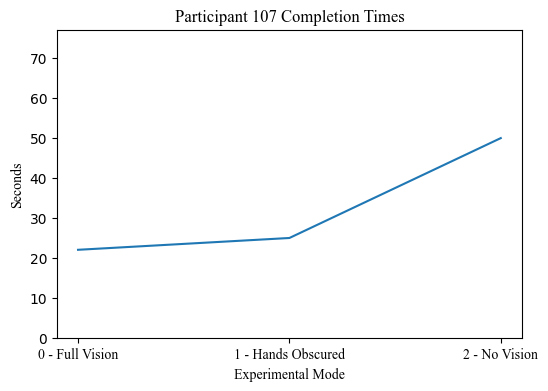

108: (20.48, 28.566, 27.77)


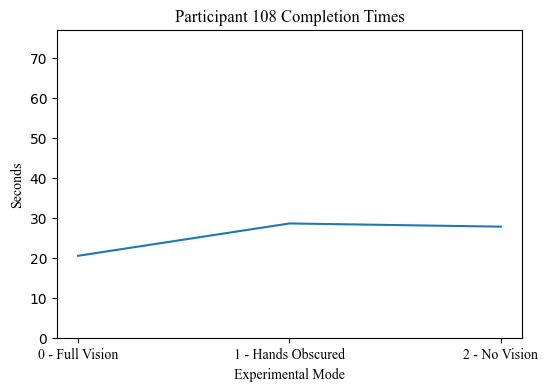

205: (9.097, 7.604, 8.804)


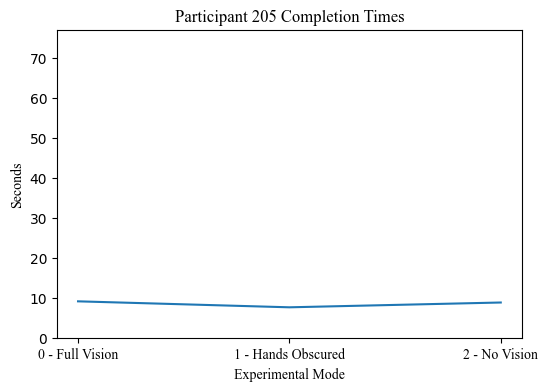

206: (3.559, 14.784, 21.206)


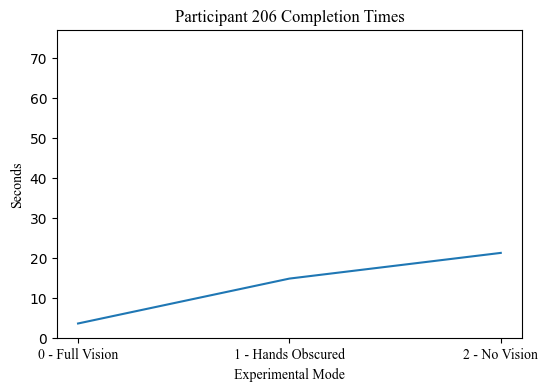

208: (9.557, 6.675, 9.606)


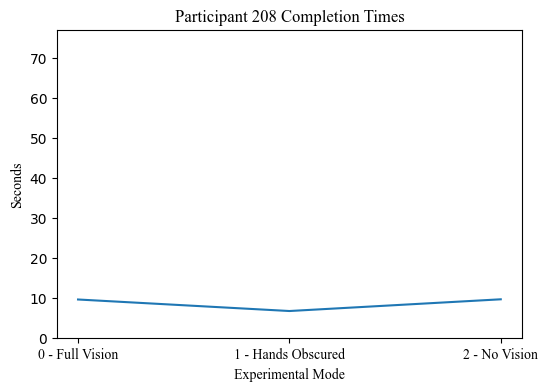

210: (72.903, 57.437, 63.2)


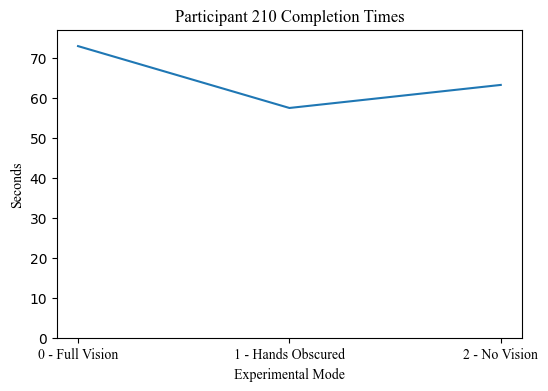

300: (31.415, 41.353, 35.532)


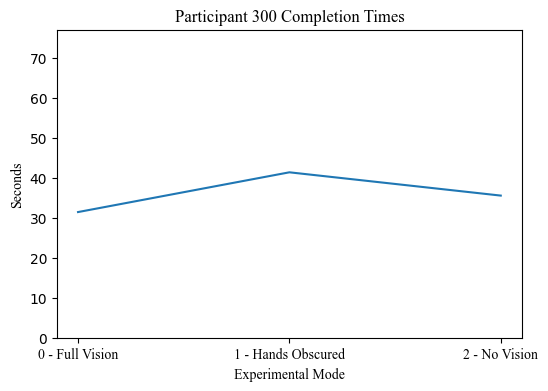

301: (20.472, 32.493, 43.955)


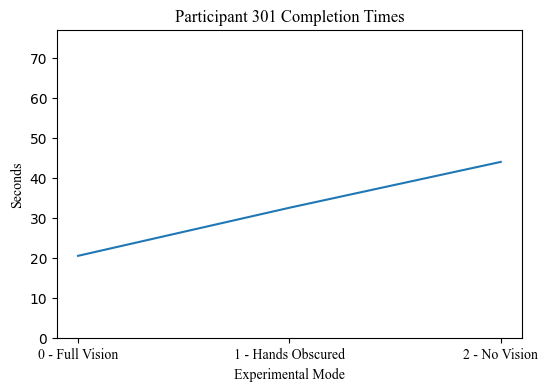

302: (35.501, 32.328, 43.206)


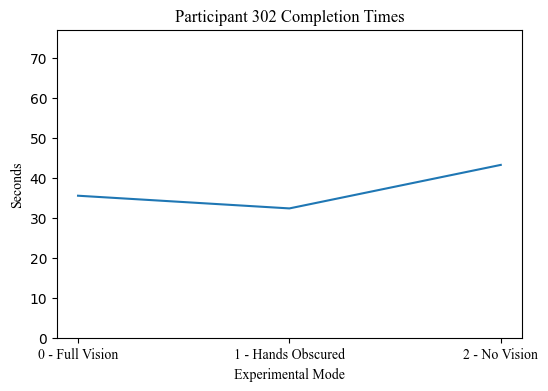

In [41]:
# print(mode0)
user_times:dict = {}
for i in range(len(mode0)):
    pid = mode0[i][12:15]
    set = (mode0_times[i], mode1_times[i], mode2_times[i])
    user_times[pid] = set
    # print(f'{i}: {pid}, {set}')
    
for k,v in user_times.items():
    title = f'{k} Completion Times'
    x = (0,1,2)
    xticks = ('0 - Full Vision', '1 - Hands Obscured', '2 - No Vision')
    y = v
    ymax = int(max(mode0_stats['maximum'],mode1_stats['maximum'],mode2_stats['maximum']))+5
    print(f'{k}: {y}')
    fig = plt.figure(figsize =(6, 4))
    plt.title(f'Participant {title}', **tnr)
    plt.xticks(np.arange(3), ('0 - Full Vision', '1 - Hands Obscured', '2 - No Vision'), **tnr)
    plt.ylim((0,ymax))
    
    plt.xlabel("Experimental Mode", **tnr)
    plt.ylabel("Seconds", **tnr)
    
    plt.plot(x,y)
    plt.show()
    filename = title.replace(' ','-').lower()
    fig.savefig(f'../Images/userCompletionTimes/{filename}.png')
    

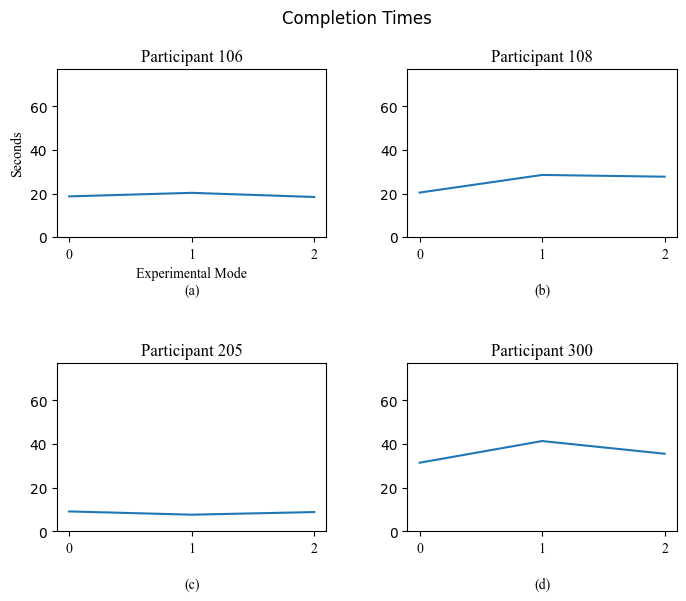

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(8)

ax1.plot(user_times['106'])
ax2.plot(user_times['108'])
ax3.plot(user_times['205'])
ax4.plot(user_times['300'])


# ax1.set_xlabel("iPhone 8")
ax1.set_xticks(np.arange(3), ('0', '1', '2'), **tnr)
ax2.set_xticks(np.arange(3), ('0', '1', '2'), **tnr)
ax3.set_xticks(np.arange(3), ('0', '1', '2'), **tnr)
ax4.set_xticks(np.arange(3), ('0', '1', '2'), **tnr)
ax1.set_ylim((0,ymax))
ax2.set_ylim((0,ymax))
ax3.set_ylim((0,ymax))
ax4.set_ylim((0,ymax))

ax1.set_ylabel("Seconds", **tnr)
# ax2.set_xlabel("iPhone 15 Pro MAX")
ax1.set_title("Participant 106", **tnr)
ax2.set_title("Participant 108", **tnr)
ax3.set_title("Participant 205", **tnr)
ax4.set_title("Participant 300", **tnr)
ax1.set_xlabel("Experimental Mode\n(a)", **tnr)
ax2.set_xlabel("\n(b)", **tnr)
ax3.set_xlabel("\n(c)", **tnr)
ax4.set_xlabel("\n(d)", **tnr)


# plt.boxplot([ip8_avg, ip15_avg])
plt.suptitle("Completion Times")
# plt.ylabel("Miliseconds Per Frame")
plt.subplots_adjust(wspace=0.3, hspace=0.75) 
plt.show()

fig.savefig(f'../Images/userCompletionTimes/Slower1s.png')

